In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('globalterrorismdb_0919dist.xlsx')

In [115]:
# data: 191464 data points; 135 columns
df.shape

(191464, 135)

# Data cleaning

## clean up useless data 

## 44 columns 

(3)time-related: iyear(#), imonth(#), iday(#)

(8)location related: country(#), country_text(txt), region(#), region_text(txt), provstate(txt), city(txt), latitude(#), longitude(#)

(1)outcome: success(0/1)

(7)attack properties: attacktype1(#), attacktype1_txt(txt), weaptype1(#, weapon type), weaptype1_txt(txt), weapsubtype1(#, more specific value for most of the Weapon Types), weapsubtype1_txt(txt),  suicide(0/1)

(6)target details: targtype1(#), targtype1_txt(txt), targsubtype1(#), targsubtype1_txt(txt), natlty1(#, nationality of the target), natlty1_txt(txt), 

(5)perpetrators details: gname(txt, the name of the group that carried out the attack), motive(txt, a lot of missing data), nperps(#, number of perpetrators involved), nperpcap(#, number of perpetrators captured), claimed(0/1, whether a group or person(s) claimed responsibility for the attack), 

(8)fatalities + damage: nkills(#, number of Fatalities), nkillus(#, number of US fatalities), nkillter(#, number of perpetrators fatalities), nwound(#, number of injured), nwoundus(#, number of us injured), property(0/1,  if there is evidence of property damage from the incident.), propextent(#, extent of the property damage), propvalue(#, exact U.S. dollar amount (at the time of the incident) of total damages is listed), 

(6)victim related: ishostkid(0/1,  whether or not the victims were taken hostage (i.e. held against their will) or kidnapped), nhostkid(#, total Number of Hostages/ Kidnapping Victims), nhostkidus(#, total Number of US Hostages/ Kidnapping Victims), ransom(0/1, Ransom Demanded), ransomamt(#, amount of ransom demanded), hostkidoutcome(#, outcome of the hostage/kidnapping)

In [221]:
df = df[['iyear','imonth','iday','country','country_txt','region','region_txt','provstate','city','latitude','longitude','success','attacktype1','attacktype1_txt','weaptype1','weaptype1_txt','weapsubtype1','weapsubtype1_txt','suicide','targtype1','targtype1_txt','targsubtype1','targsubtype1_txt','natlty1','natlty1_txt','gname','motive','nperps','nperpcap','claimed','nkill','nkillus','nkillter','nwound','nwoundus','property','propextent','propvalue','ishostkid','nhostkid','nhostkidus','ransom','ransomamt','hostkidoutcome']]

In [222]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'success',
       'attacktype1', 'attacktype1_txt', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'suicide', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'nperps', 'nperpcap', 'claimed',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'ransom', 'ransomamt', 'hostkidoutcome'],
      dtype='object')

The remaining 44 columns are the data we need for analysis

## checking for missing data

In [224]:
#finding missing data
rows_with_missing_data = df[df.isnull().any(axis=1)]

Note there are **191441** rows with missing data, while the shape of the original data we have indicates that we have **191464** rows of data in total. Therefore, it is **impossible to drop all NaN values**.

The purpose of this project is to *find the trends of terrorist attack*, 
we will then do data cleaning per data visualization group. 

#### so we put time-related and location-related columns as the most important ones, among which the lack in details are acceptable (i.e., **take 'iyear', 'country', 'country_txt', 'region', and 'region_txt' as columns whose NaN values need to be dropped**.) 

In [225]:
df.shape

(191464, 44)

# Data visualization: 

## (1) time, location 

### number of incidents over the year

#### data cleaning (iyear, region, longitude, latitude)

In [226]:
print(df[['iyear']].isnull().values.any(),df[['region']].isnull().values.any(),
      df[['longitude']].isnull().values.any(),df[['latitude']].isnull().values.any())

False False True True


iyear, region columns do not have missing data

longitude and latitude columns both have missing data, while since we only plot it on the map, missing data will simply not plot anything. So it will not affect the result 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93acd0828>]],
      dtype=object)

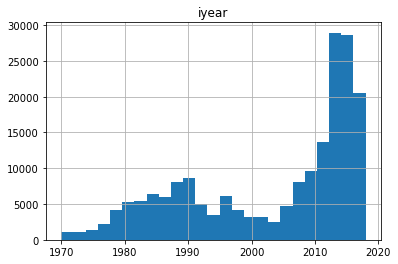

In [227]:
df[['iyear']].hist(bins=25)

### For each year, what is the distribution of the incidents?

#### (a) using region: 
1 = North America

Canada, Mexico, United States

2 = Central America & Caribbean

Antigua and Barbuda, Bahamas, Barbados, Belize, Cayman Islands, Costa Rica, Cuba, Dominica, Dominican Republic, El Salvador, Grenada, Guadeloupe, Guatemala, Haiti,Honduras, Jamaica, Martinique, Nicaragua, Panama, St. Kitts and Nevis, St. Lucia, Trinidad and Tobago

3 = South America

Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Falkland Islands, French Guiana, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela

4 = East Asia

China, Hong Kong, Japan, Macau, North Korea, South Korea, Taiwan

5 = Southeast Asia

Brunei, Cambodia, East Timor, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore, South Vietnam, Thailand, Vietnam

6 = South Asia

Afghanistan, Bangladesh, Bhutan, India, Maldives, Mauritius, Nepal, Pakistan, Sri Lanka

7 = Central Asia

Armenia, Azerbaijan, Georgia, Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan

8 = Western Europe

Andorra, Austria, Belgium, Cyprus, Denmark, Finland, France, Germany, Gibraltar, Greece, Iceland, Ireland, Italy, Luxembourg, Malta, Netherlands, Norway, Portugal, Spain, Sweden, Switzerland, United Kingdom, Vatican City, West Germany (FRG)

9 = Eastern Europe

Albania, Belarus, Bosnia-Herzegovina, Bulgaria, Croatia, Czech Republic, Czechoslovakia, East Germany (GDR), Estonia, Hungary, Kosovo, Latvia, Lithuania, Macedonia, Moldova, Montenegro, Poland, Romania, Russia, Serbia, SerbiaMontenegro, Slovak Republic, Slovenia, Soviet Union, Ukraine, Yugoslavia

10 = Middle East & North Africa

Algeria, Bahrain, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Libya, Morocco, North Yemen, Qatar, Saudi Arabia, South Yemen, Syria, Tunisia, Turkey, United Arab Emirates, West Bank and Gaza Strip, Western Sahara, Yemen

11 = Sub-Saharan Africa

Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Democratic Republic of the Congo, Djibouti, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, People's Republic of the Congo, Republic of the Congo, Rhodesia, Rwanda, Senegal, Seychelles, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Swaziland, Tanzania, Togo, Uganda, Zaire, Zambia, Zimbabwe

12 = Australasia & Oceania 

Australia, Fiji, French Polynesia, New Caledonia, New Hebrides, New Zealand, Papua New Guinea, Solomon Islands, Vanuatu, Wallis and Futuna

In [228]:
region_txts = ['North America', 'Central America & Caribbean', 'South America', 'East Asia', 'Southeast Asia', 
                'South Asia', 'Central Asia', 'Western Europe', 'Eastern Europe', 'Middle East & North Africa', 
               'Sub-Saharan Africa', 'Australasia & Oceania']
region_codes = range(1,13)
region_dict = dict(zip(region_codes, region_txts)) 
region_dict

{1: 'North America',
 2: 'Central America & Caribbean',
 3: 'South America',
 4: 'East Asia',
 5: 'Southeast Asia',
 6: 'South Asia',
 7: 'Central Asia',
 8: 'Western Europe',
 9: 'Eastern Europe',
 10: 'Middle East & North Africa',
 11: 'Sub-Saharan Africa',
 12: 'Australasia & Oceania'}

In [229]:
# plt.plot(region_codes, region_txts)
# plt.xlabel('region_codes')
# plt.ylabel('region_txts')
# plt.show()

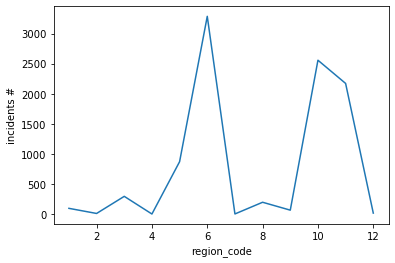

In [230]:
# sample 
# select data from 2018 
data_2018 = df.loc[df['iyear'] == 2018]

region_count = []
for j in range(1,13):
    region_count.append(sum(data_2018['region'] == j))
# verify # in region_count == size of data_2018
# data_2018.shape[0] == sum(region_count)

# get top 3 regions for 2018 
top_3_idx = np.argsort(region_count)[-3:]
top_3_idx = [x+1 for x in top_3_idx]
top_3_region = [region_dict[x] for x in top_3_idx]
top_3_region

# plot data from 2018 by region 
plt.plot(region_codes, region_count)
plt.xlabel('region_code')
plt.ylabel('incidents #')
plt.show()

In [231]:
# loop; 
# for each year, display distribution of attack numbers(y) vs regions(x)
top_3_regions_list = []
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]

    region_count = []
    for j in range(1,13):
        region_count.append(sum(data_year['region'] == j))
    # verify # in region_count == size of data_year
    # data_year.shape[0] == sum(region_count)

    # get top 3 regions for iyear 
    top_3_idx = np.argsort(region_count)[-3:]
    top_3_idx = [x+1 for x in top_3_idx]
    top_3_region = [region_dict[x] for x in top_3_idx]
    top_3_regions_list.append(top_3_region)

    # plot data from iyear by region 
#     plt.plot(region_codes, region_count)
#     plt.title(i)
#     plt.xlabel('region_code')
#     plt.ylabel('incidents #')
#     plt.show()

In [232]:
top_3_regions_list_key = range(1970, 2019)
top_3_regions_list_value = top_3_regions_list
top_3_regions_list_dict = dict(zip(top_3_regions_list_key, top_3_regions_list_value)) 

In [233]:
# top 3 regions of terrorism incidents over the year 
top_3_regions_list_dict

{1970: ['Western Europe', 'South America', 'North America'],
 1971: ['Middle East & North Africa', 'Western Europe', 'North America'],
 1972: ['Middle East & North Africa', 'North America', 'Western Europe'],
 1973: ['North America', 'South America', 'Western Europe'],
 1974: ['South America', 'North America', 'Western Europe'],
 1975: ['South America', 'North America', 'Western Europe'],
 1976: ['South America', 'North America', 'Western Europe'],
 1977: ['North America', 'Middle East & North Africa', 'Western Europe'],
 1978: ['Central America & Caribbean', 'South America', 'Western Europe'],
 1979: ['Middle East & North Africa',
  'Central America & Caribbean',
  'Western Europe'],
 1980: ['Middle East & North Africa',
  'Western Europe',
  'Central America & Caribbean'],
 1981: ['South America', 'Western Europe', 'Central America & Caribbean'],
 1982: ['Western Europe', 'South America', 'Central America & Caribbean'],
 1983: ['Western Europe', 'Central America & Caribbean', 'South 

#### (b) using longitudes and latitudes 

In [234]:
# pip install shapely
# pip install descartes
# conda install geopandas

In [235]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [236]:
# missing year 1993 data points 
data_2018 = df.loc[df['iyear'] == 1993]
data_2018.shape

(0, 44)

In [237]:
# practice on one year 

# data_2018 = df.loc[df['iyear'] == 1993]

# longitude_list = data_2018['longitude']
# latitude_list = data_2018['latitude']

# geometry = [Point(xy) for xy in zip(longitude_list, latitude_list)]
# gdf = GeoDataFrame(data_2018, geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(figsize=(10, 6))
# ax.set_title(2018)
# gdf.plot(ax=ax, marker='o', color='red', markersize=15);

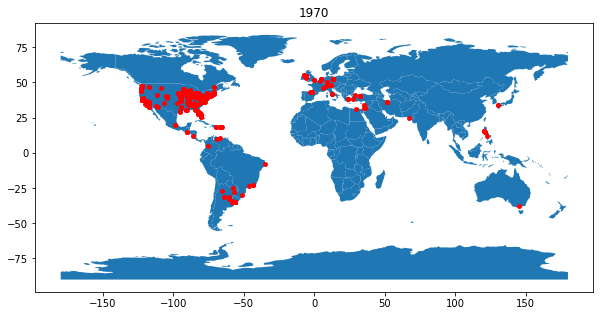

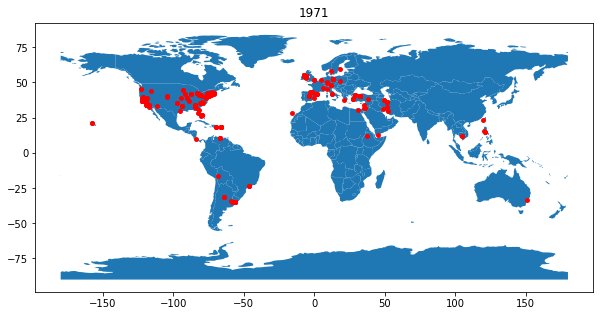

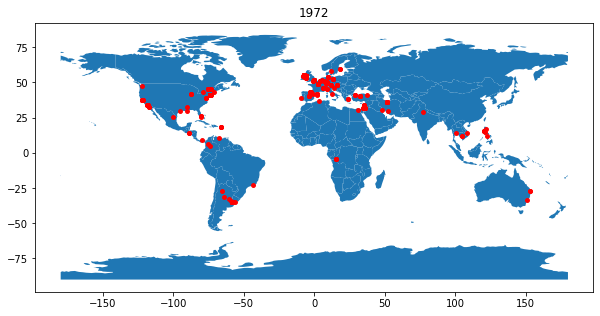

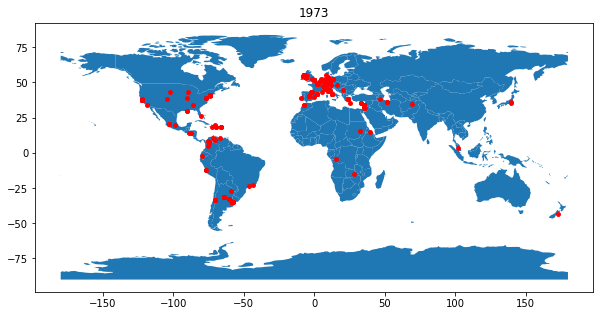

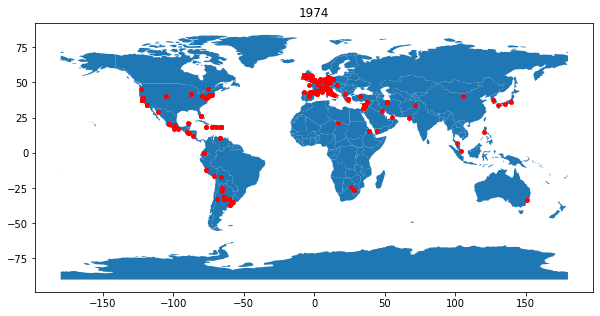

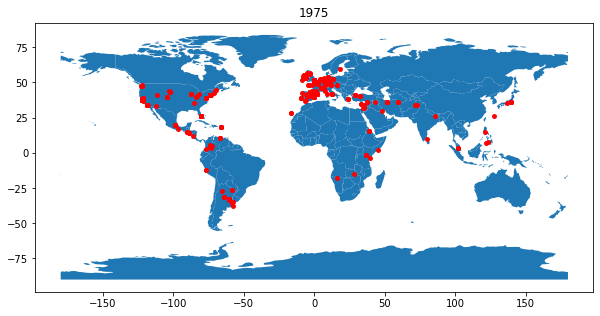

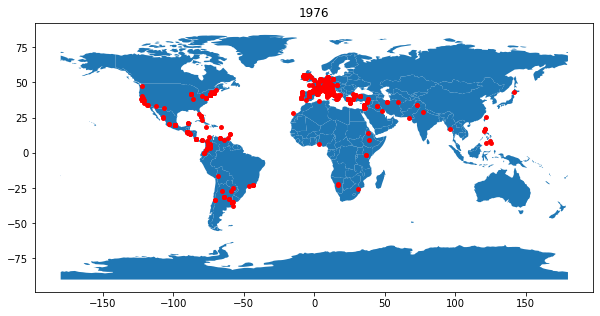

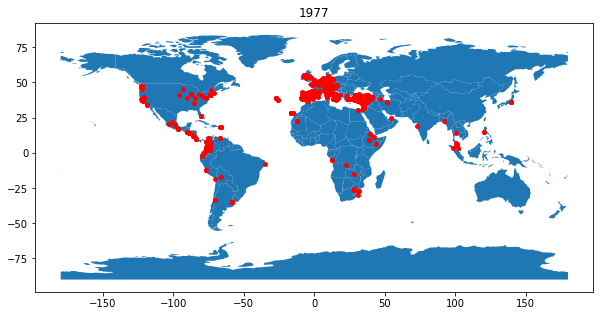

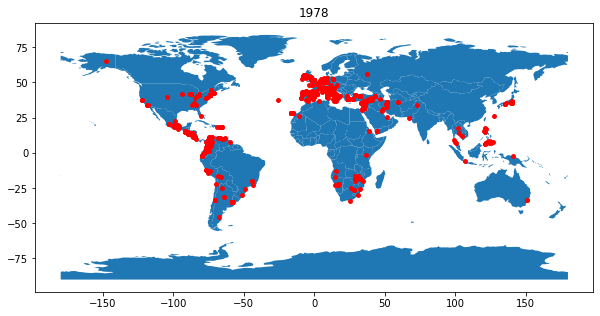

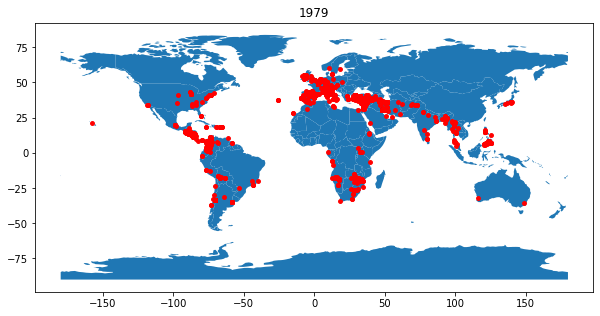

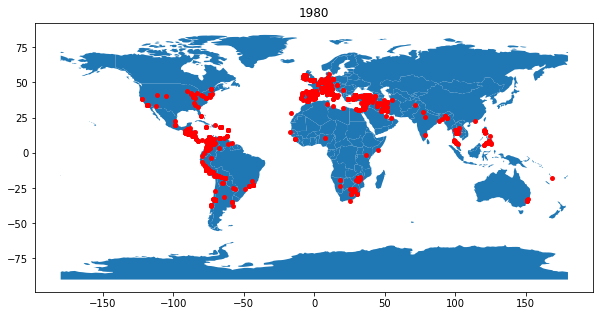

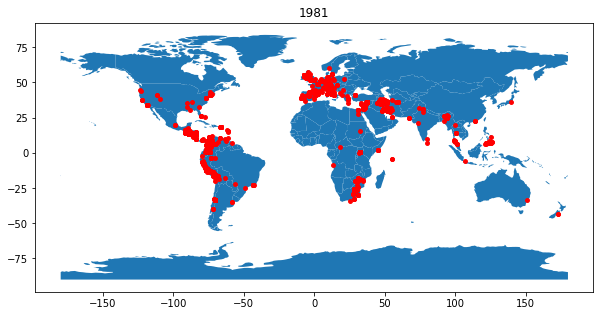

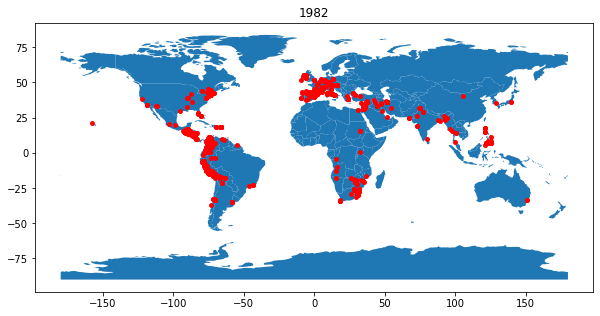

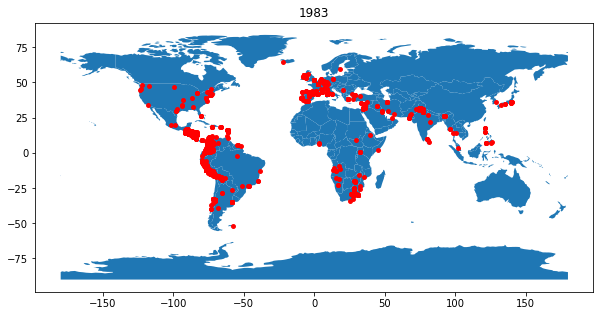

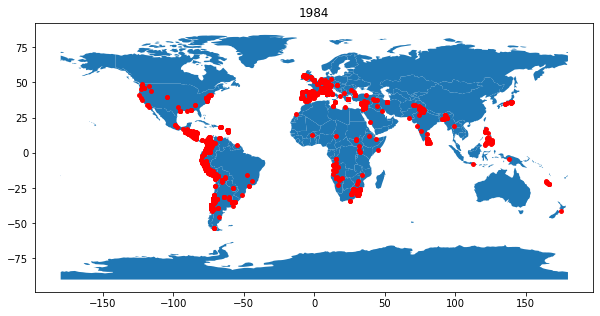

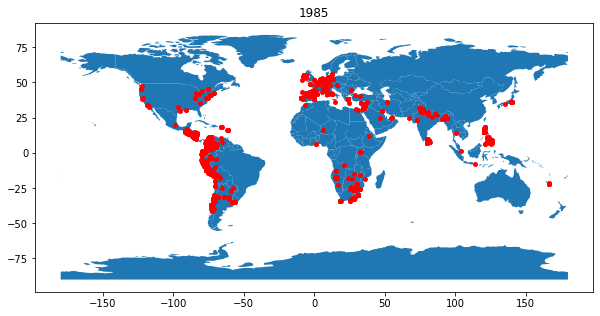

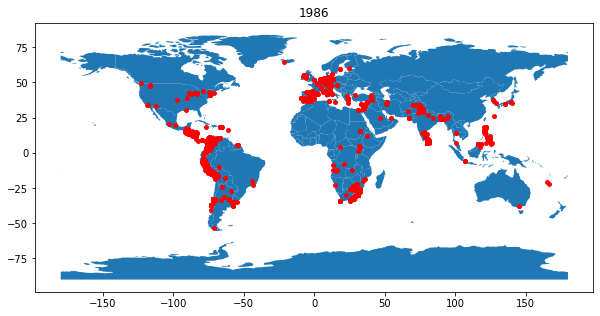

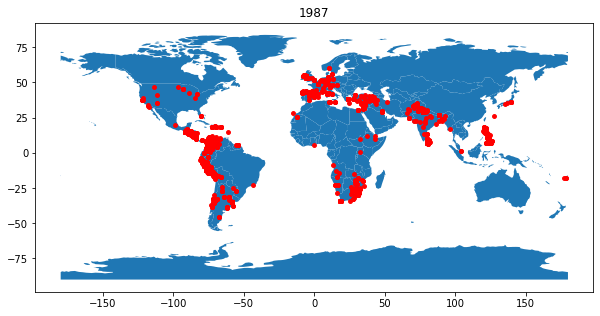

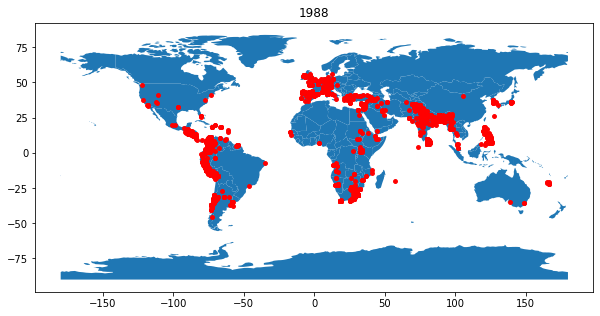

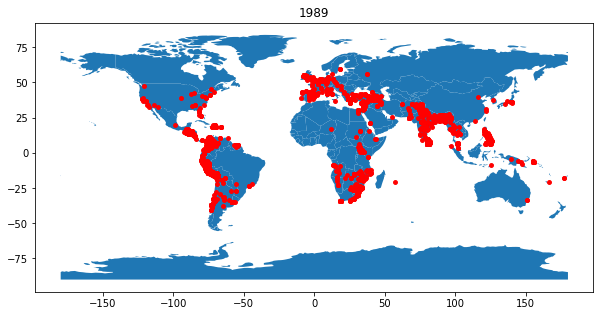

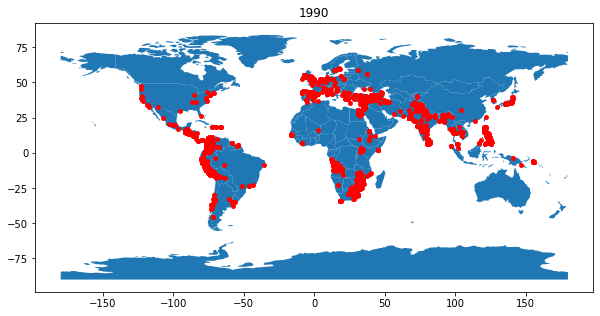

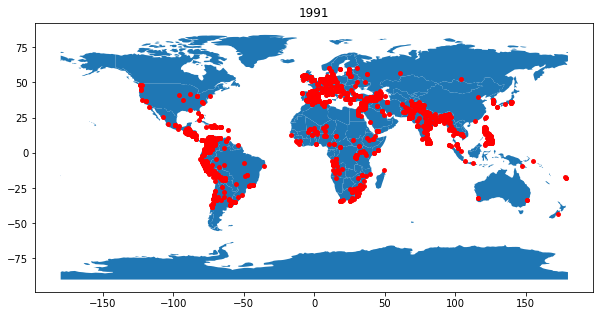

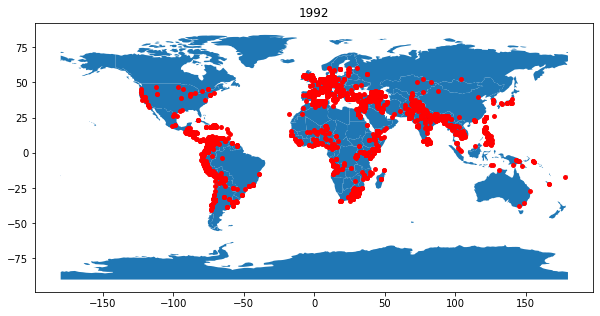

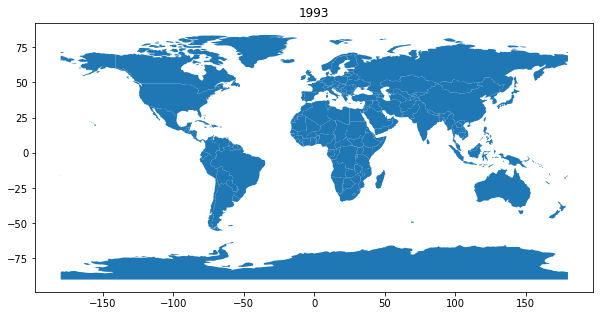

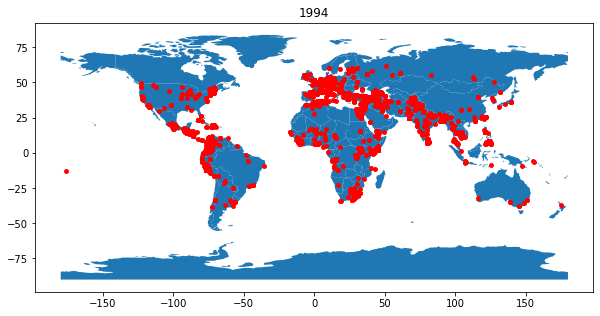

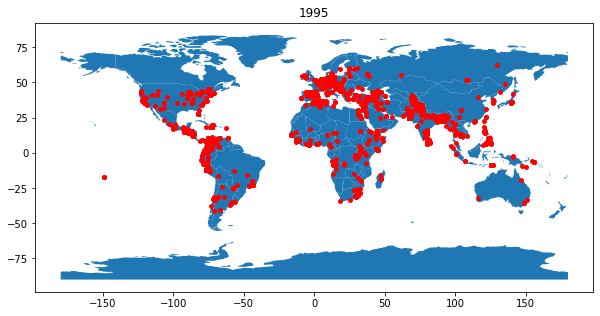

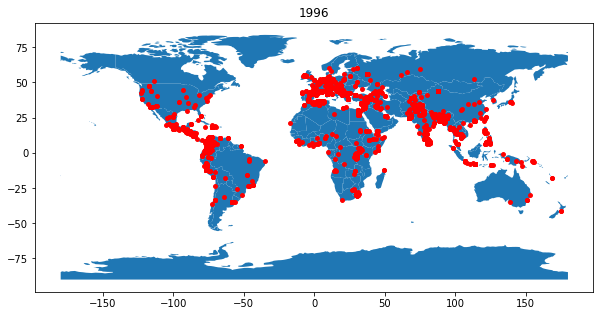

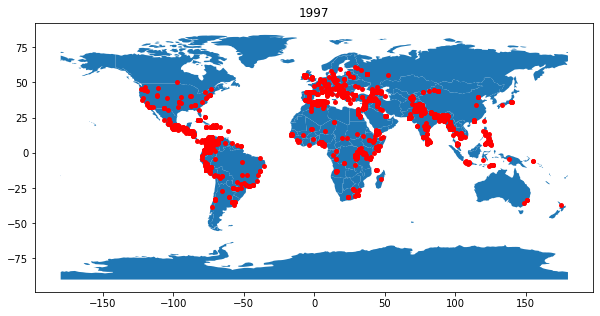

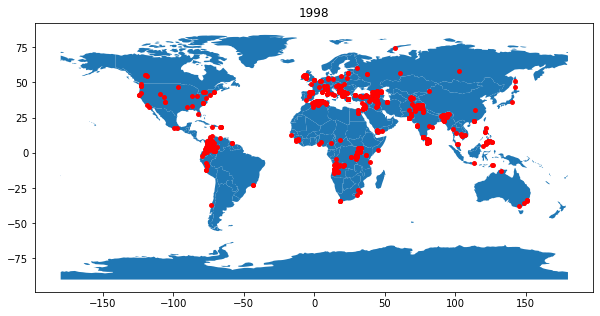

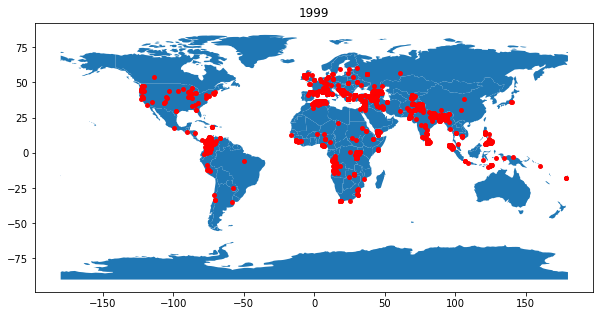

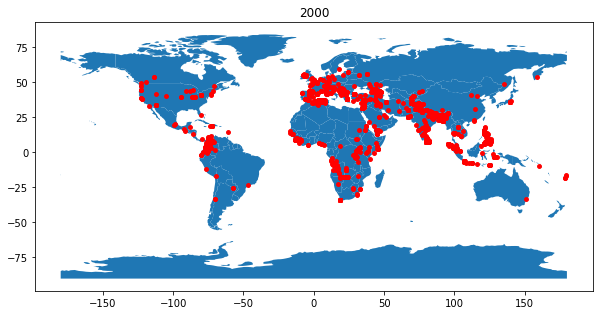

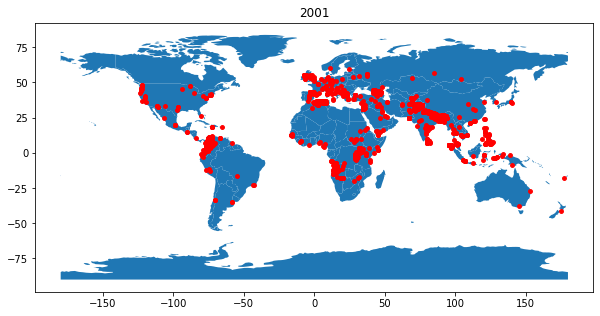

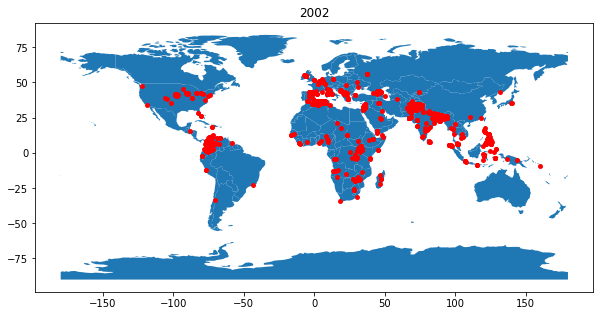

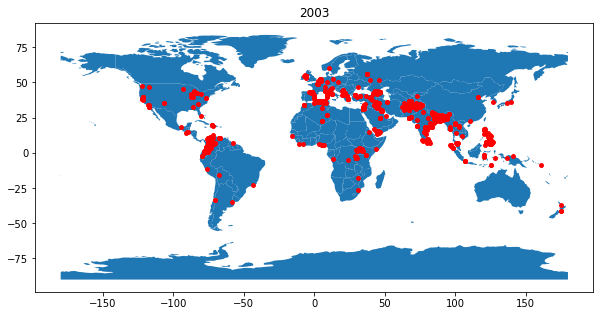

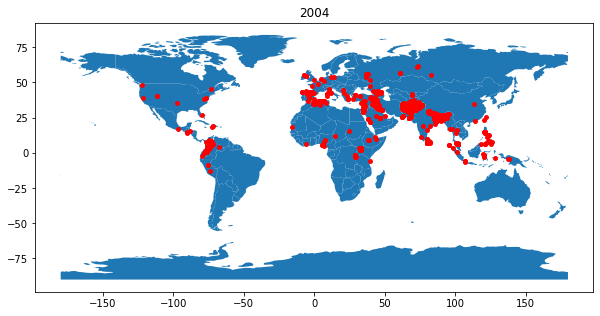

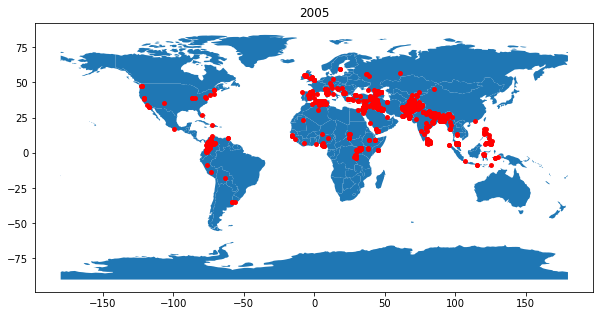

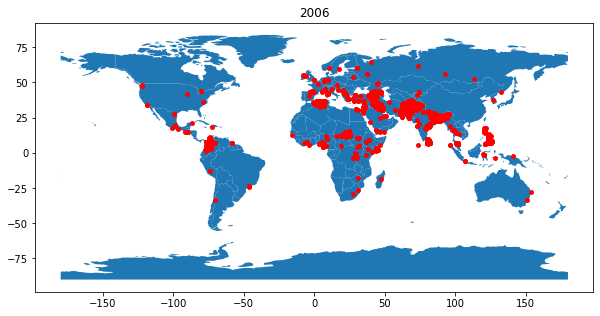

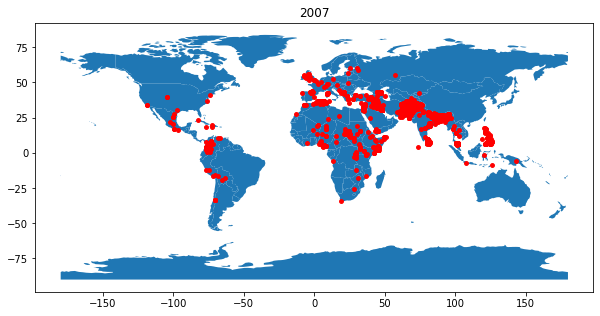

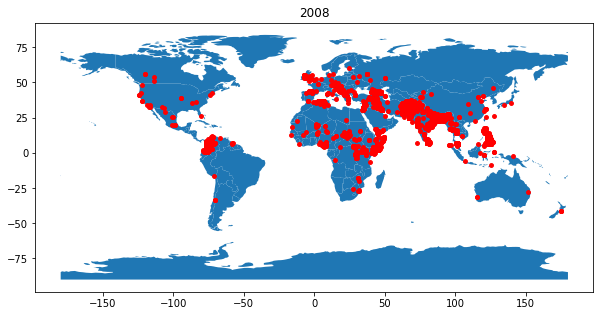

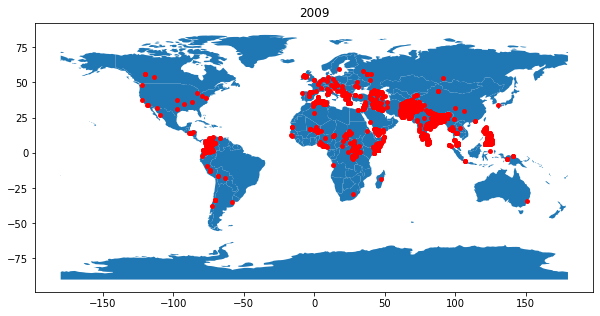

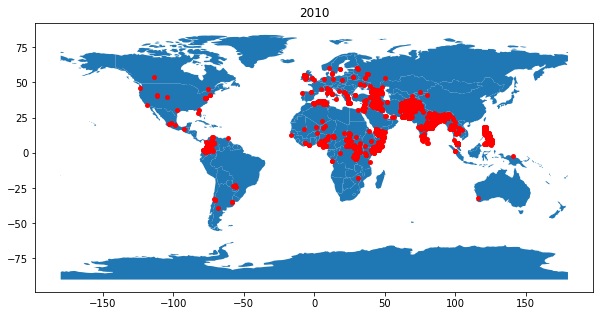

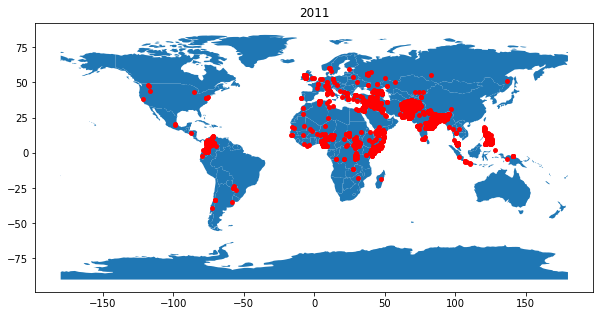

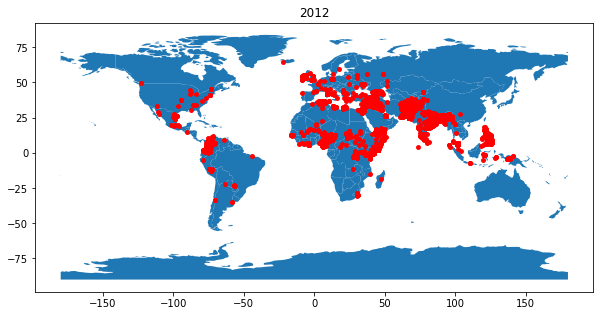

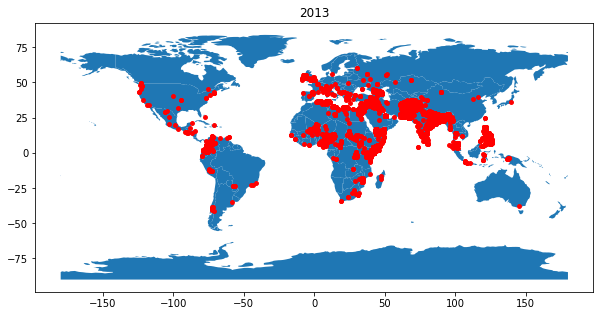

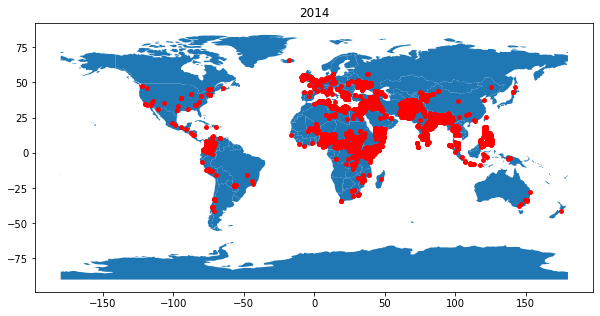

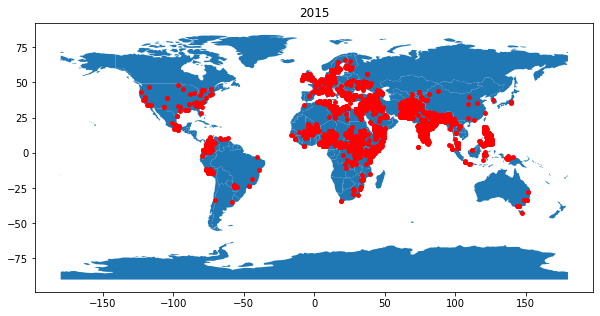

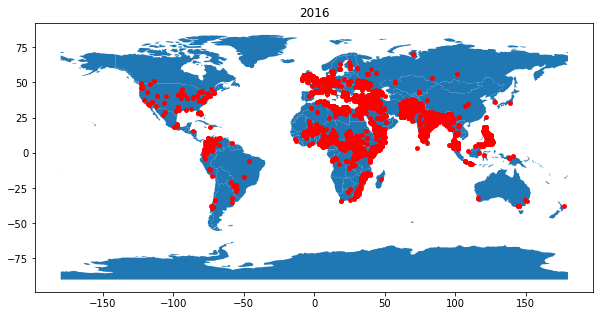

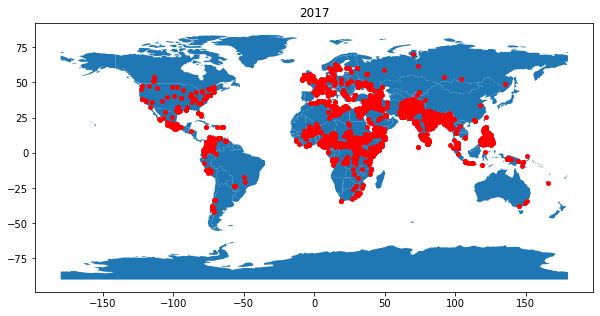

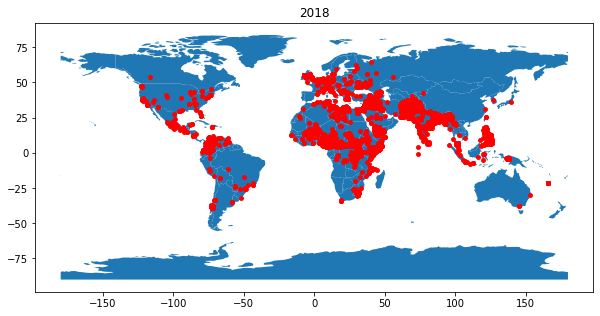

In [238]:
import warnings
warnings.filterwarnings('ignore')

# distribution of terrorism accidents over the year 
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]

    longitude_list = data_year['longitude']
    latitude_list = data_year['latitude']

    geometry = [Point(xy) for xy in zip(longitude_list, latitude_list)]
    gdf = GeoDataFrame(data_year, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(10, 6))
    ax.set_title(i)
    gdf.plot(ax=ax, marker='o', color='red', markersize=15);

In [110]:
# question: why did the distribution change? 

## (2) attacker vs time 

#### data cleaning ("iyear", "attacktype1", "weaptype1", "suicide")

In [239]:
print(df[['iyear']].isnull().values.any(),df[['attacktype1']].isnull().values.any(),
      df[['weaptype1']].isnull().values.any(), df[['suicide']].isnull().values.any())

False False False False


iyear, attacktype1, weaptype1, suicide columns do not have missing data

so we can move on to do visualization 

In [240]:
df.shape

(191464, 44)

#### suicide/non_suicide vs region over year plot

In [241]:
suicide_df=df[df['suicide']==1]

top_3_suicide_region_list = []
suicide_count={}
for i in range(1970,2019):
    data_year = suicide_df.loc[suicide_df['iyear'] == i]
    region_count = []
    for j in range(1,13):
        region_count.append(sum(data_year['region'] == j))
    suicide_count[i]=sum(region_count)
# verify # in region_count == size of data_year
# data_year.shape[0] == sum(region_count)
# get top 3 regions for iyear
    top_3_idx = np.argsort(region_count)[-3:]
    top_3_idx = [x+1 for x in top_3_idx]
    top_3_region = [region_dict[x] for x in top_3_idx]
    top_3_suicide_region_list.append(top_3_region)
# plot data from iyear by region
#     plt.plot(region_codes, region_count)
#     plt.title(i)
#     plt.xlabel('region_code')
#     plt.ylabel('suicide attack #')
#     plt.show()

In [242]:
top_3_suicide_region_list_key = range(1970, 2019)
top_3_suicide_region_list_value = top_3_suicide_region_list
top_3_suicide_region_list_dict = dict(zip(top_3_suicide_region_list_key, top_3_suicide_region_list_value))
top_3_suicide_region_list_dict

{1970: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1971: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1972: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1973: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1974: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1975: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1976: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1977: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1978: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1979: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1980: ['Middle East & North Africa',
  'Sub-Saharan Africa',
  'Australasia & Oceania'],
 1981: ['S

In [243]:
non_suicide_df=df[df['suicide']==0]
non_suicide_count={}
top_3_non_suicide_region_list = []
for i in range(1970,2019):
    data_year = non_suicide_df.loc[non_suicide_df['iyear'] == i]
    region_count = []
    for j in range(1,13):
        region_count.append(sum(data_year['region'] == j))
    non_suicide_count[i]=sum(region_count)
# verify # in region_count == size of data_year
# data_year.shape[0] == sum(region_count)
# get top 3 regions for iyear
    top_3_idx = np.argsort(region_count)[-3:]
    top_3_idx = [x+1 for x in top_3_idx]
    top_3_region = [region_dict[x] for x in top_3_idx]
    top_3_non_suicide_region_list.append(top_3_region)
# plot data from iyear by region
#     plt.plot(region_codes, region_count)
#     plt.title(i)
#     plt.xlabel('region_code')
#     plt.ylabel('non-suicide attack #')
#     plt.show()

In [244]:
top_3_non_suicide_region_list_key = range(1970, 2019)
top_3_non_suicide_region_list_value = top_3_non_suicide_region_list
top_3_non_suicide_region_list_dict = dict(zip(top_3_non_suicide_region_list_key, top_3_non_suicide_region_list_value))
top_3_non_suicide_region_list_dict

{1970: ['Western Europe', 'South America', 'North America'],
 1971: ['Middle East & North Africa', 'Western Europe', 'North America'],
 1972: ['Middle East & North Africa', 'North America', 'Western Europe'],
 1973: ['North America', 'South America', 'Western Europe'],
 1974: ['South America', 'North America', 'Western Europe'],
 1975: ['South America', 'North America', 'Western Europe'],
 1976: ['South America', 'North America', 'Western Europe'],
 1977: ['North America', 'Middle East & North Africa', 'Western Europe'],
 1978: ['Central America & Caribbean', 'South America', 'Western Europe'],
 1979: ['Middle East & North Africa',
  'Central America & Caribbean',
  'Western Europe'],
 1980: ['Middle East & North Africa',
  'Western Europe',
  'Central America & Caribbean'],
 1981: ['South America', 'Western Europe', 'Central America & Caribbean'],
 1982: ['Western Europe', 'South America', 'Central America & Caribbean'],
 1983: ['Western Europe', 'Central America & Caribbean', 'South 

#### change of suicide terrorist incidents over the year 

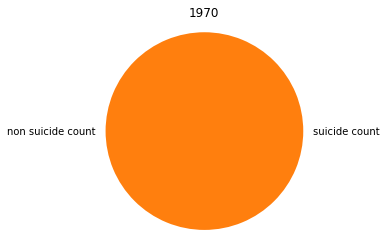

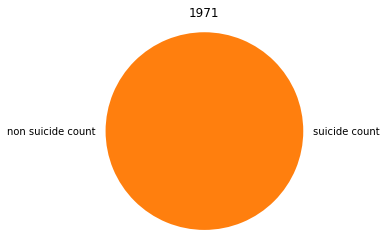

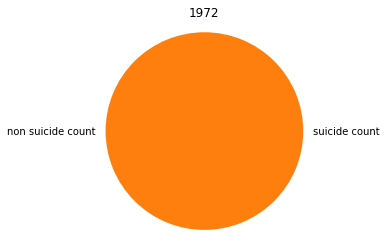

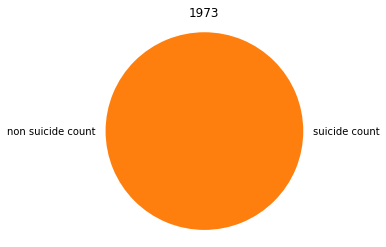

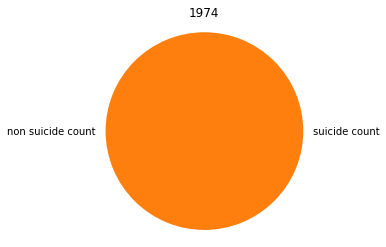

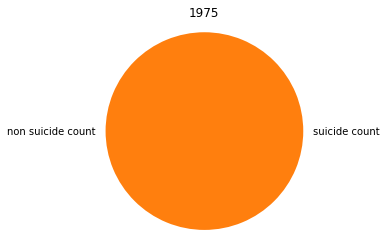

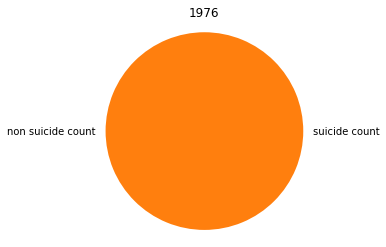

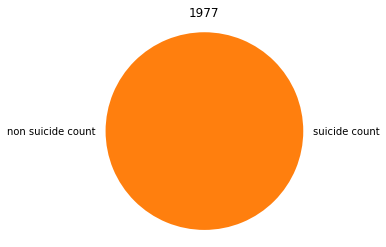

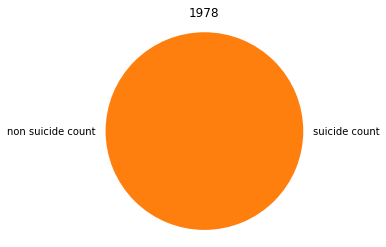

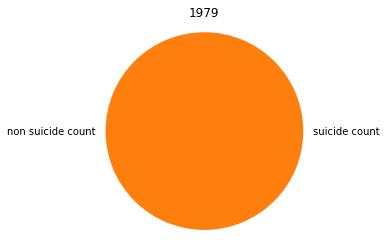

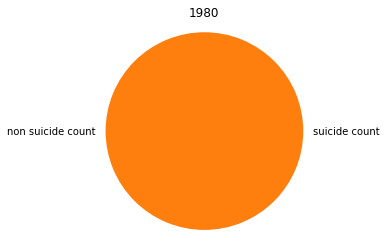

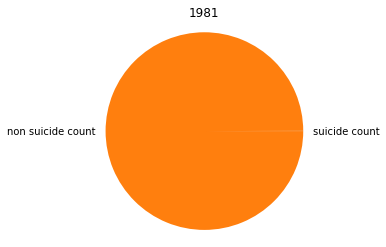

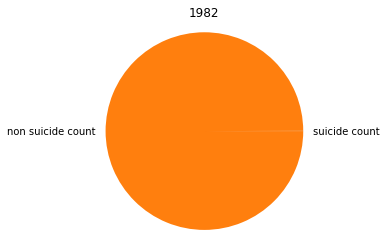

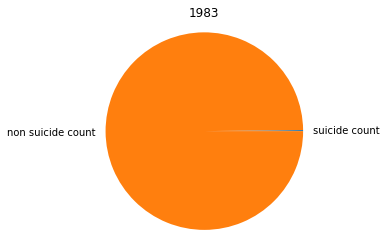

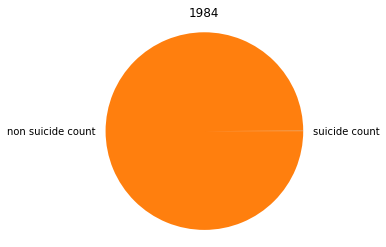

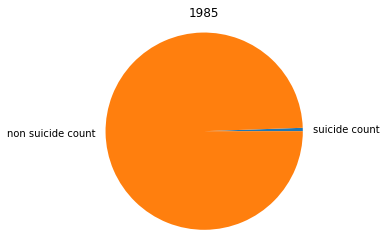

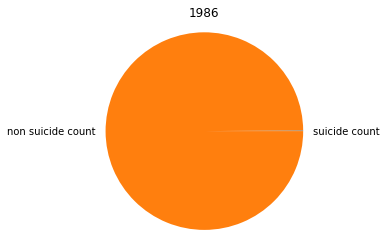

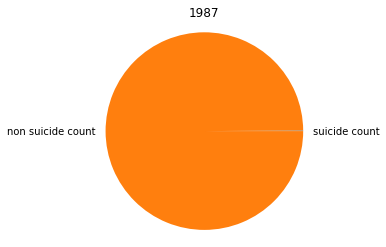

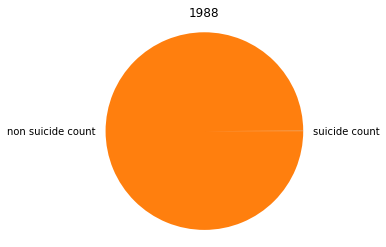

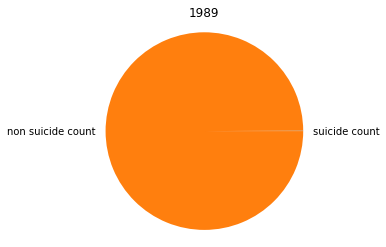

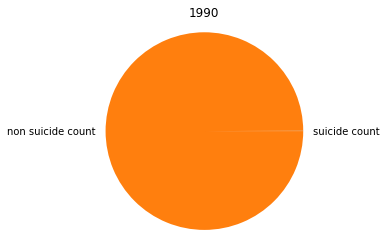

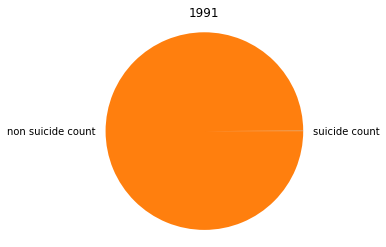

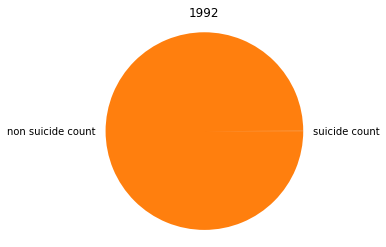

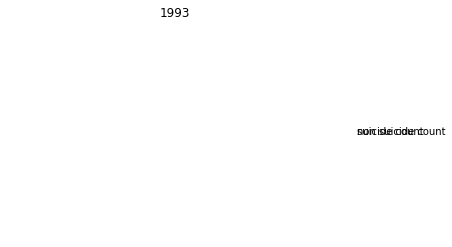

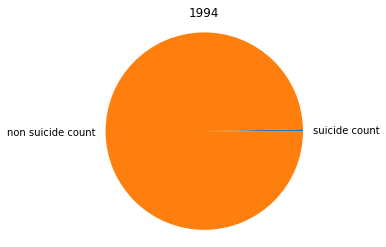

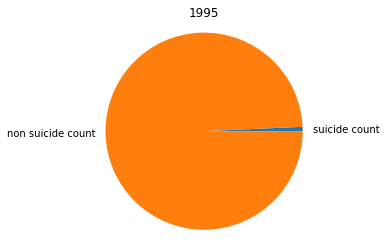

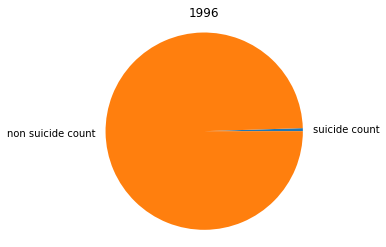

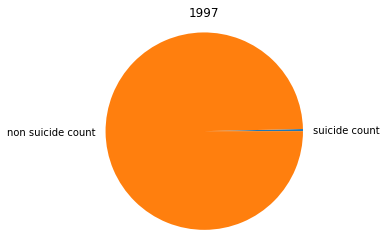

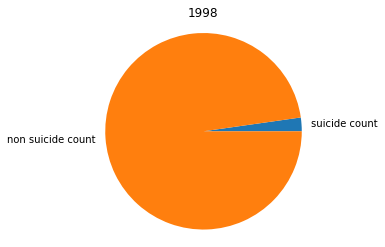

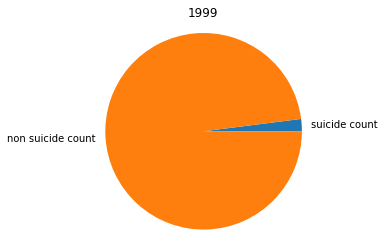

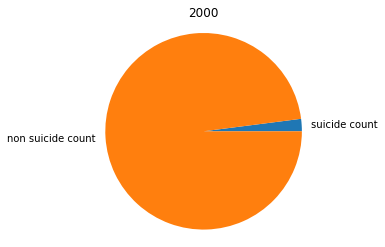

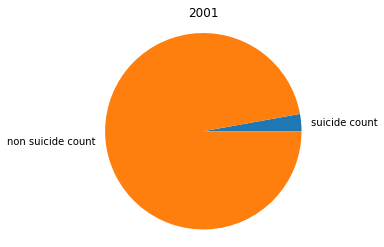

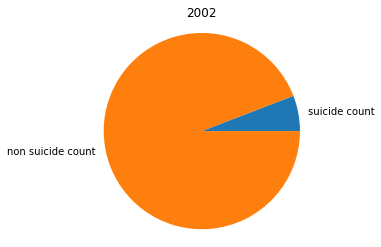

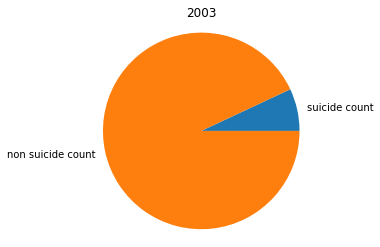

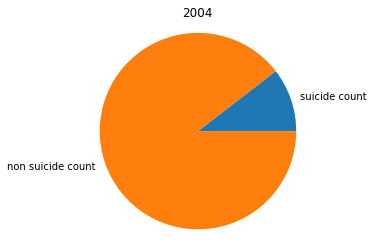

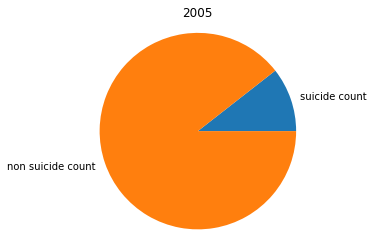

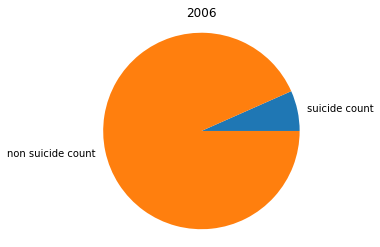

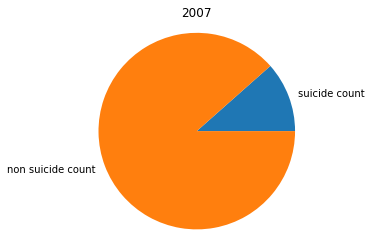

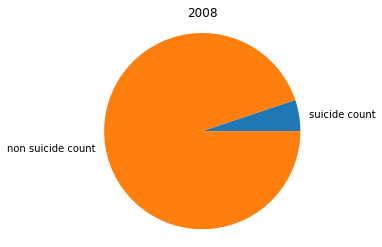

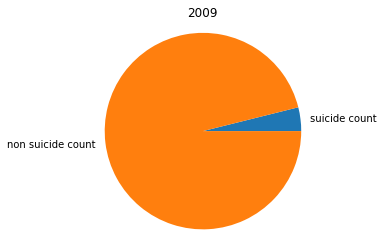

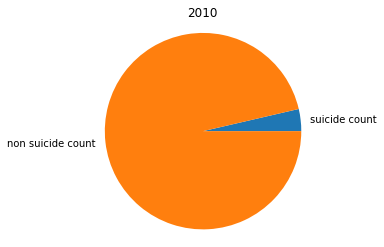

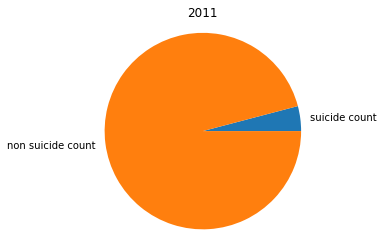

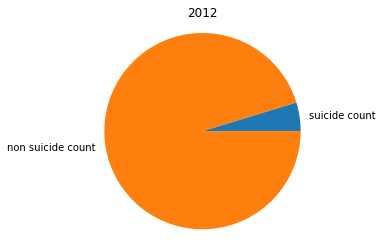

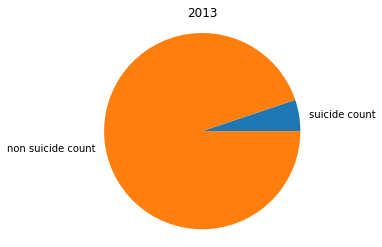

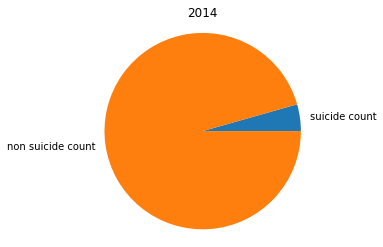

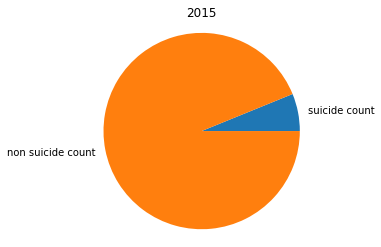

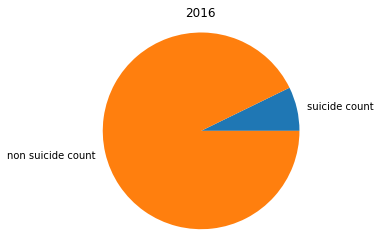

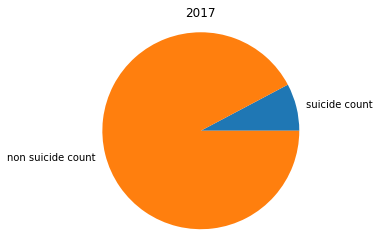

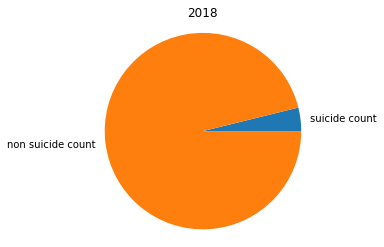

In [245]:
suicide_total = 0
non_suicide_total = 0
for i in range(1970,2019):
    labels=['suicide count','non suicide count']
    sizes=[suicide_count[i],non_suicide_count[i]]
    suicide_total += suicide_count[i]
    non_suicide_total += non_suicide_count[i]
    plt.pie(sizes,labels=labels)
    plt.title(i)
    plt.axis('equal')
    plt.show()

suicide total :  7011
non_suicide total:  184453


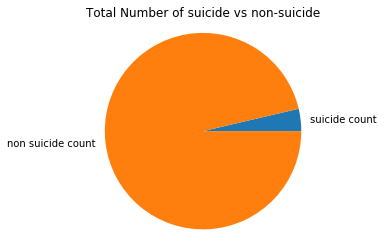

In [246]:
print("suicide total : ", suicide_total)   # suicide total 
print("non_suicide total: ", non_suicide_total) # non_suicide total
labels=['suicide count','non suicide count']
sizes=[suicide_total,non_suicide_total]
plt.pie(sizes,labels=labels)
plt.title("Total Number of suicide vs non-suicide")
plt.axis('equal')
plt.show()

#### attack type vs time plot 

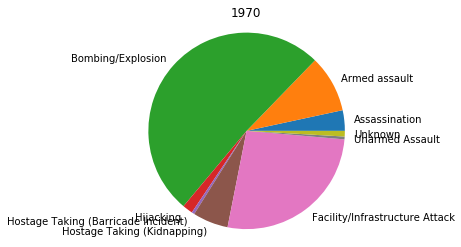

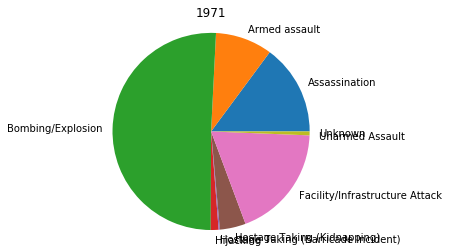

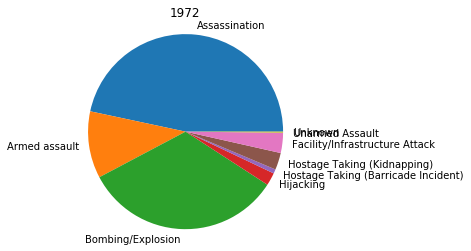

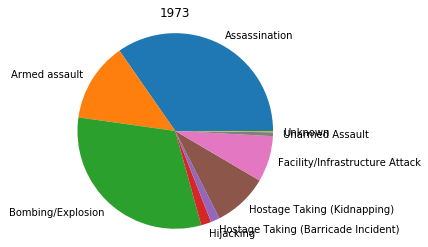

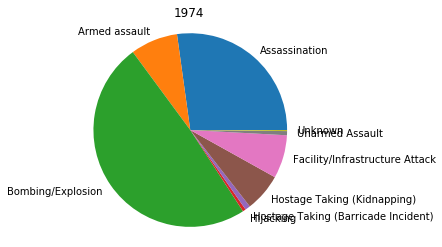

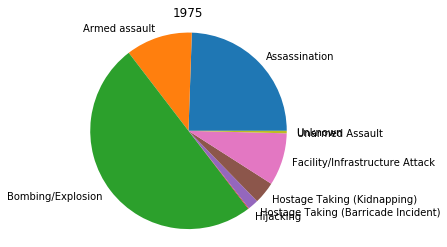

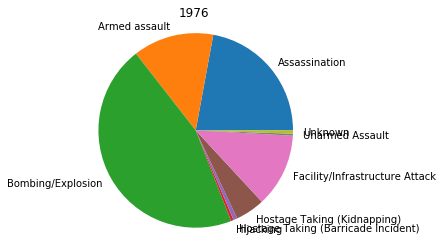

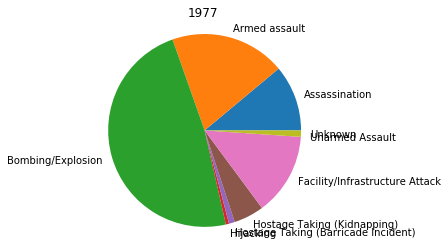

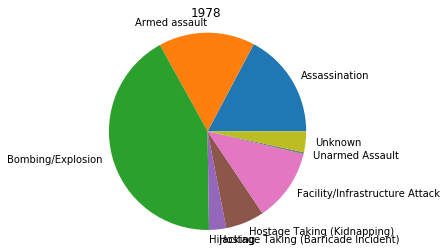

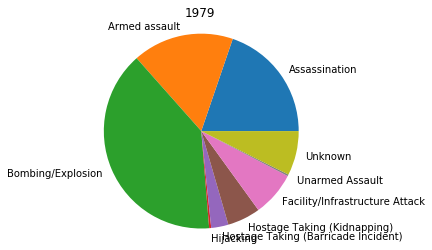

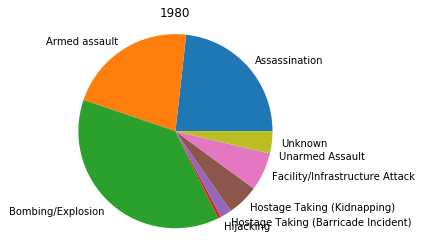

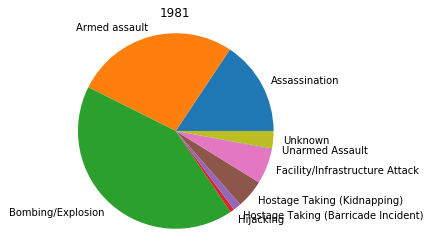

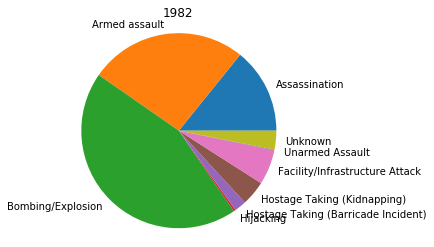

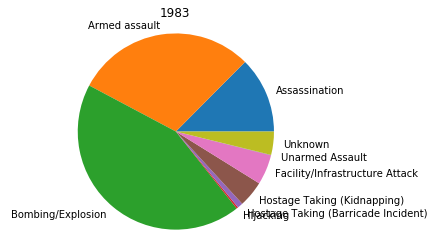

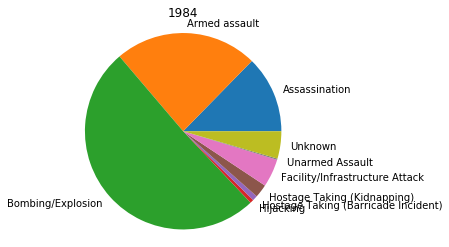

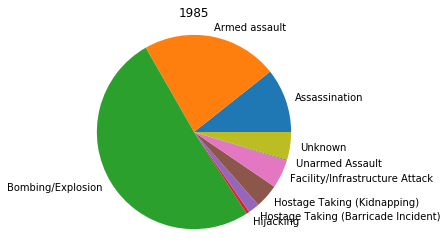

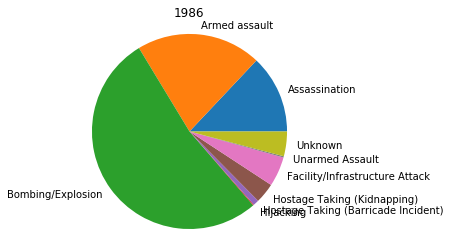

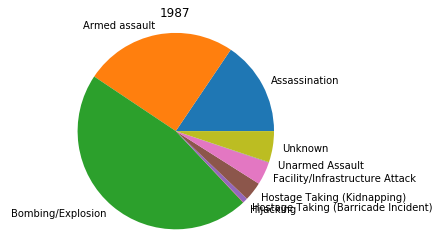

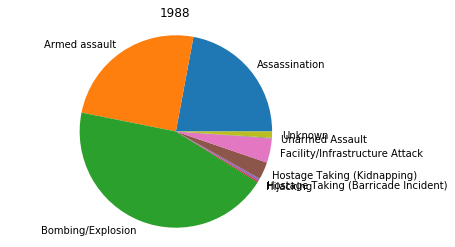

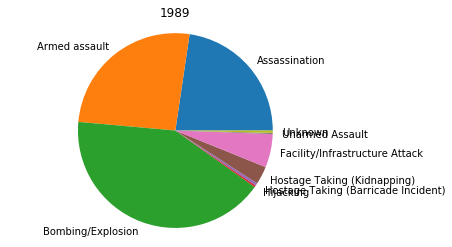

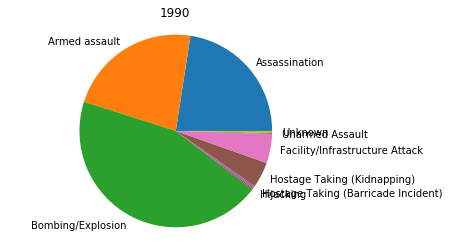

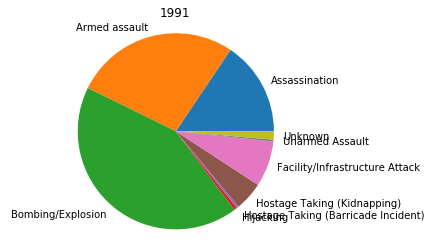

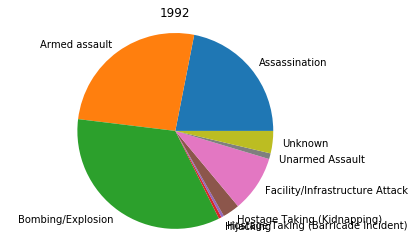

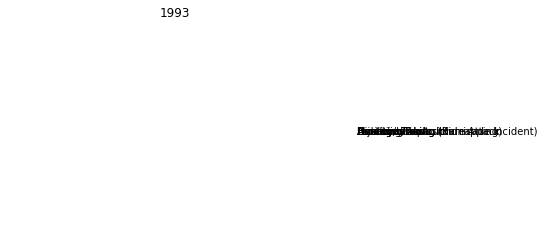

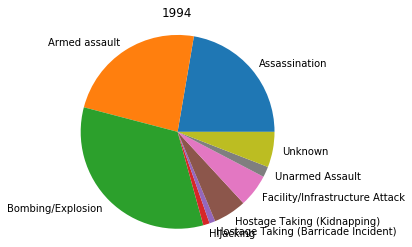

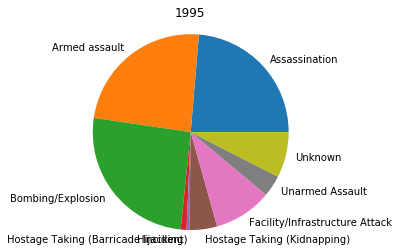

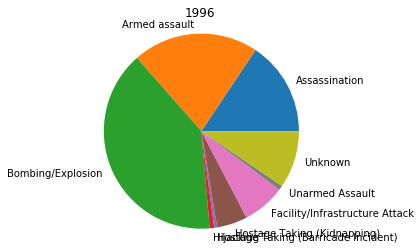

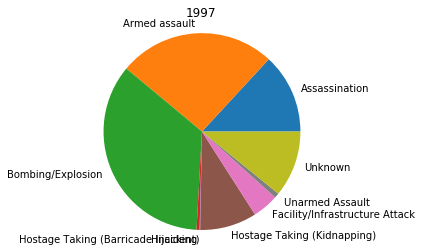

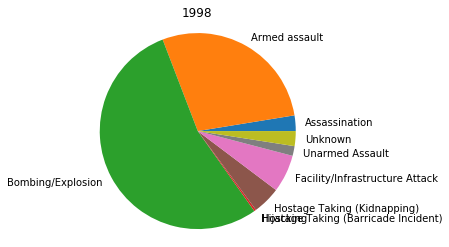

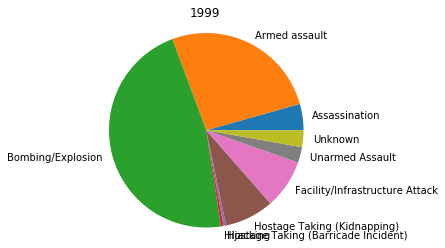

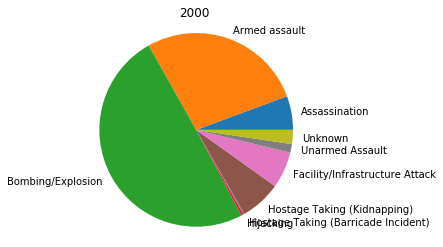

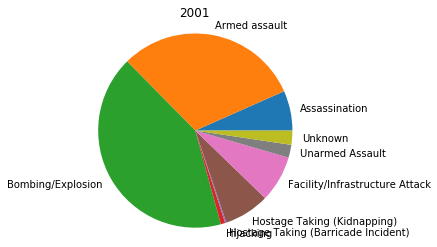

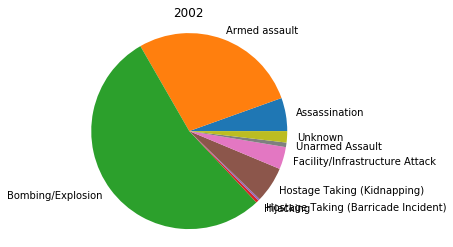

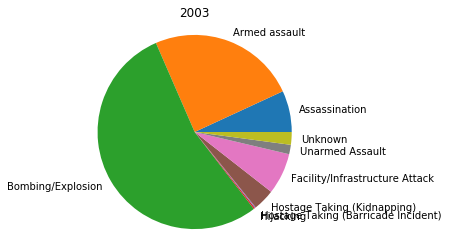

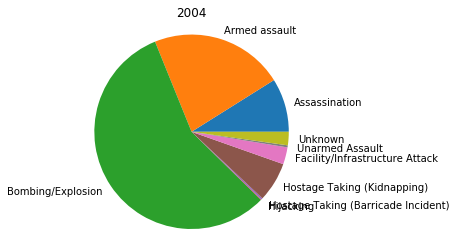

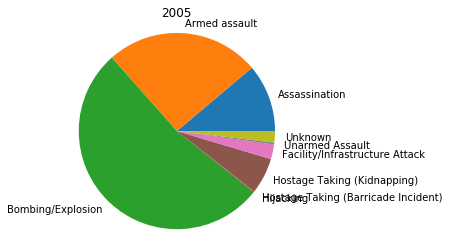

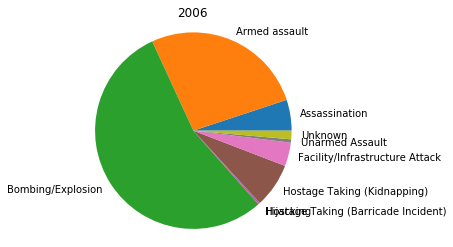

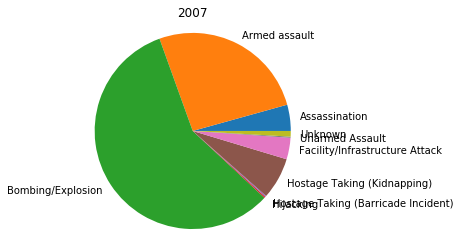

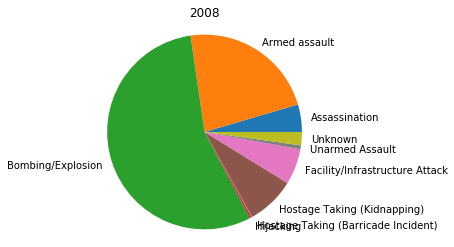

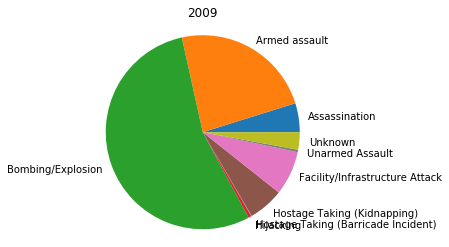

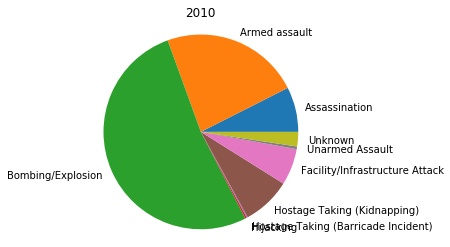

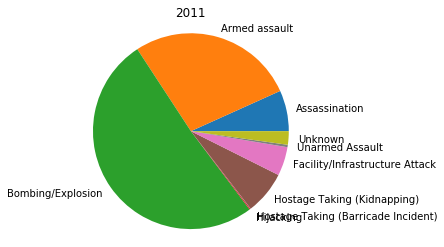

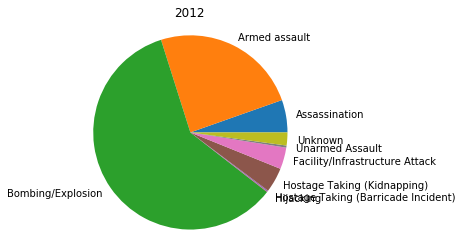

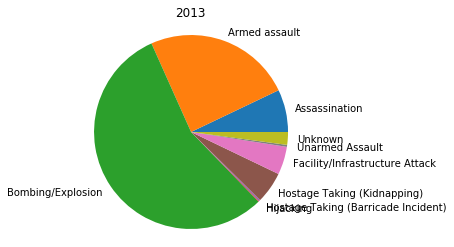

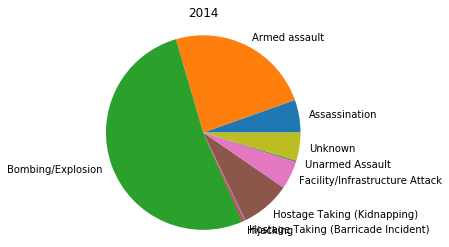

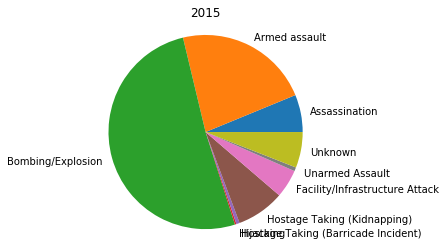

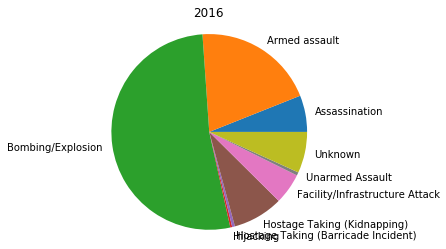

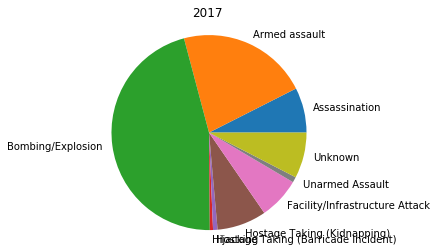

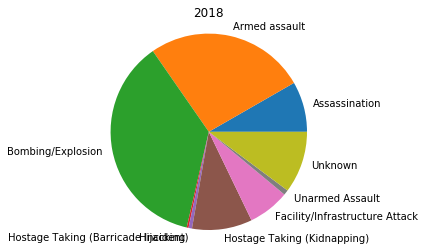

In [247]:
attack_txts = ['Assassination', 'Armed assault', 'Bombing/Explosion', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unarmed Assault', 'Unknown']
attack_codes = range(1,9)
attack_dict = dict(zip(attack_codes, attack_txts))
attack1_count={}
attack2_count={}
attack3_count={}
attack4_count={}
attack5_count={}
attack6_count={}
attack7_count={}
attack8_count={}
attack9_count={}
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]
    attack1_count=sum(data_year['attacktype1'] == 1)
    attack2_count=sum(data_year['attacktype1'] == 2)
    attack3_count=sum(data_year['attacktype1'] == 3)
    attack4_count=sum(data_year['attacktype1'] == 4)
    attack5_count=sum(data_year['attacktype1'] == 5)
    attack6_count=sum(data_year['attacktype1'] == 6)
    attack7_count=sum(data_year['attacktype1'] == 7)
    attack8_count=sum(data_year['attacktype1'] == 8)
    attack9_count=sum(data_year['attacktype1'] == 9)
    sizes=[attack1_count,attack2_count, attack3_count,attack4_count,attack5_count, attack6_count,attack7_count,attack8_count, attack9_count,]
    plt.pie(sizes,labels=attack_txts)
    plt.title(i)
    plt.axis('equal')
    plt.show()

#### weapon type vs time plot 

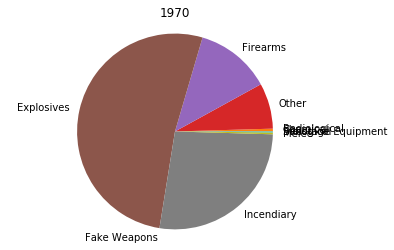

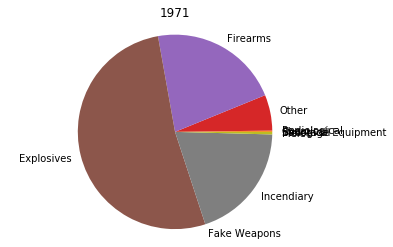

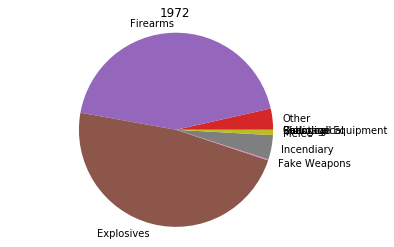

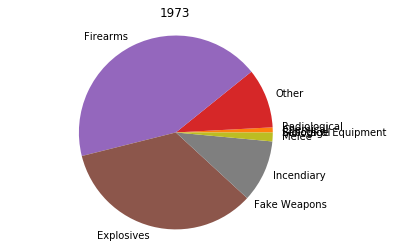

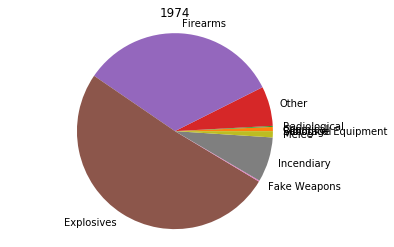

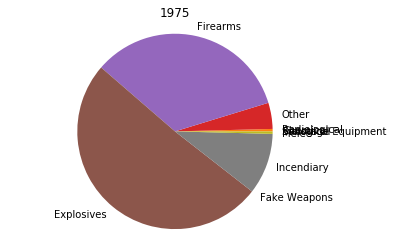

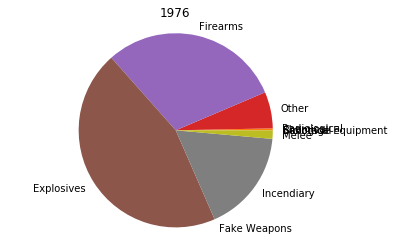

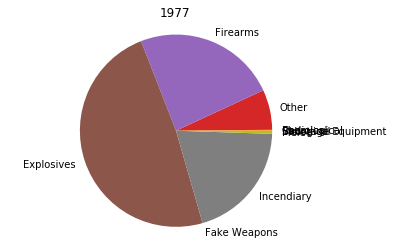

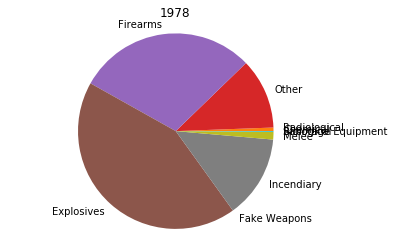

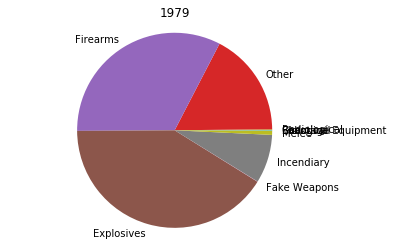

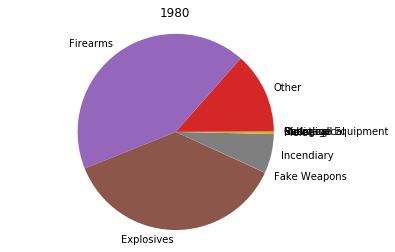

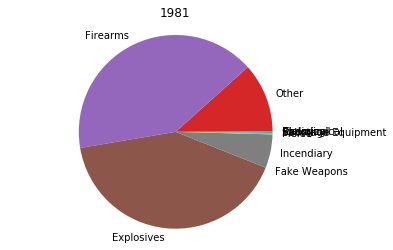

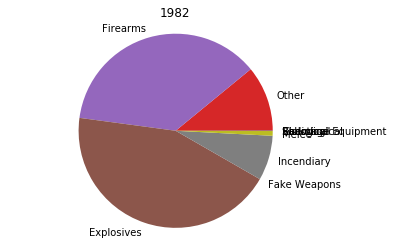

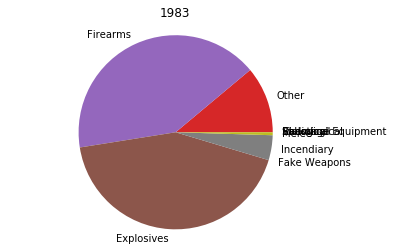

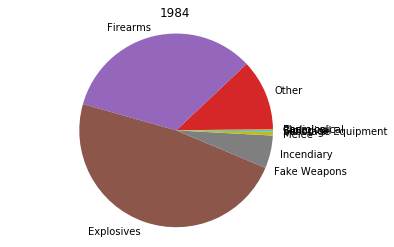

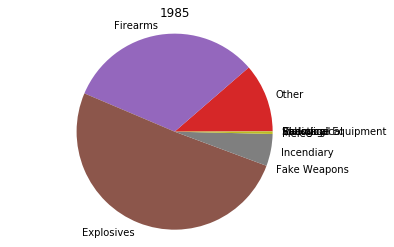

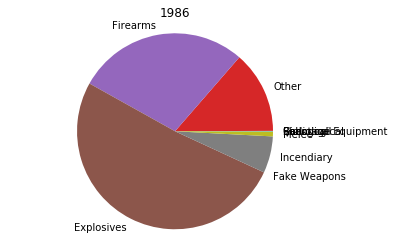

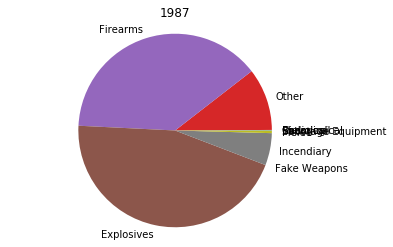

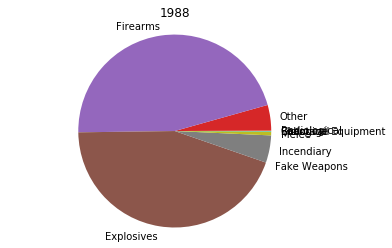

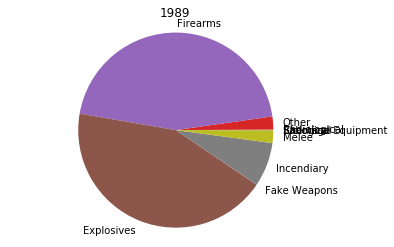

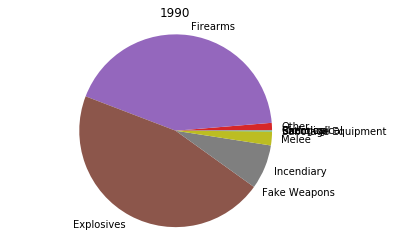

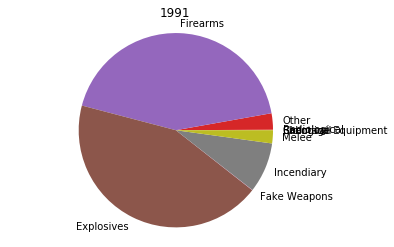

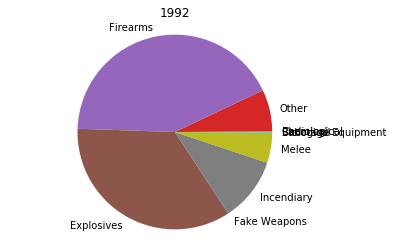

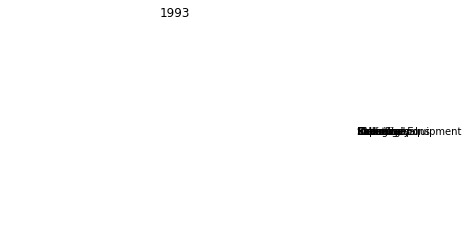

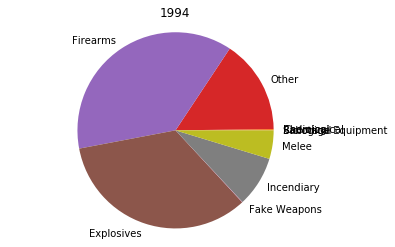

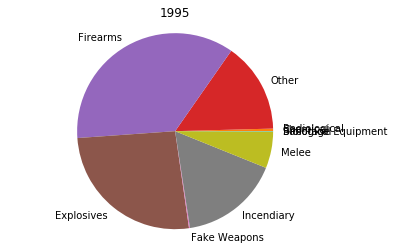

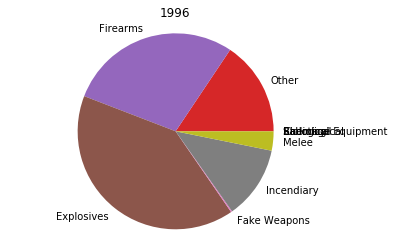

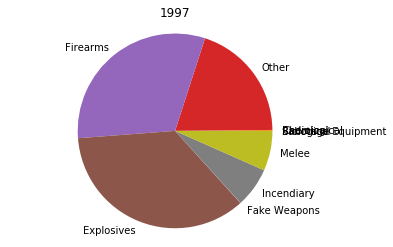

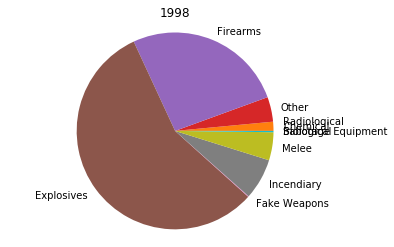

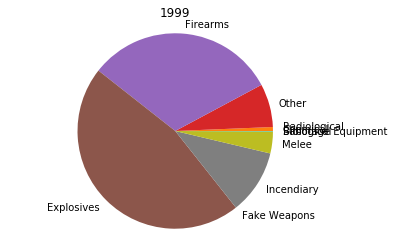

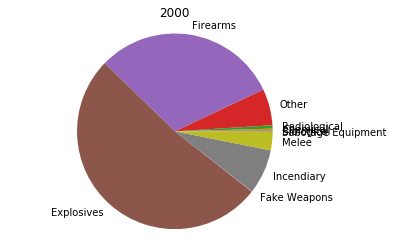

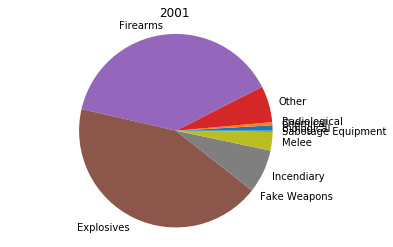

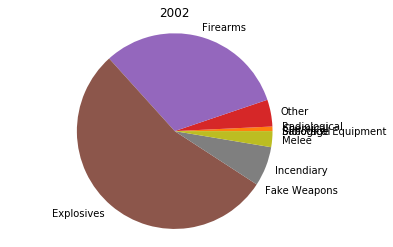

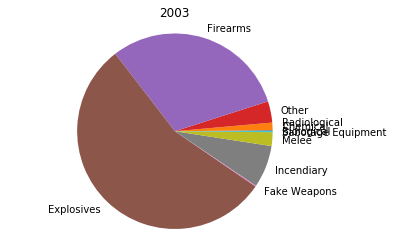

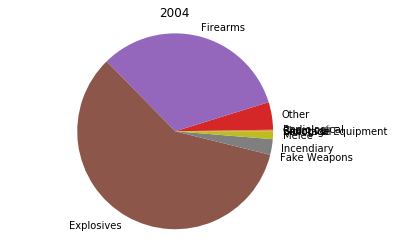

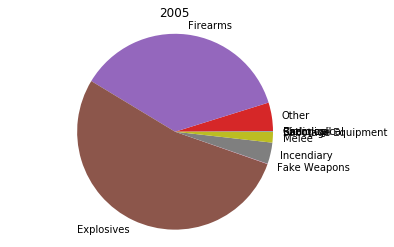

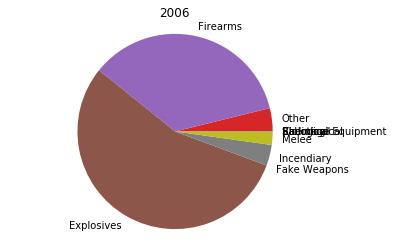

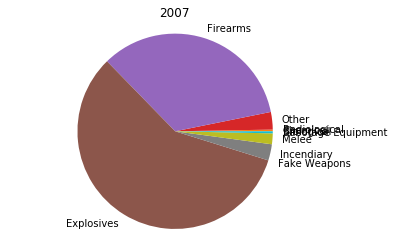

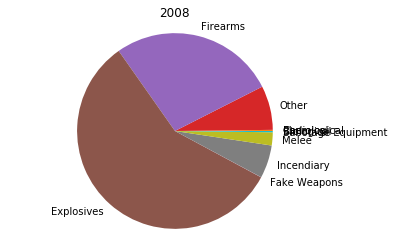

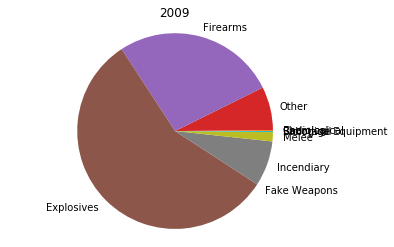

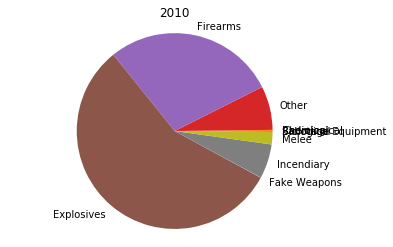

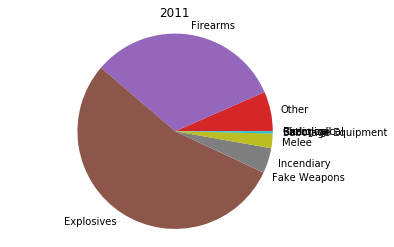

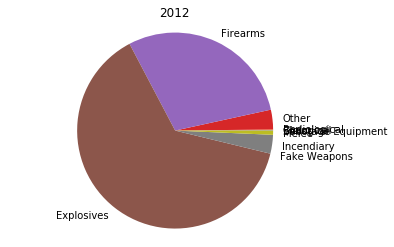

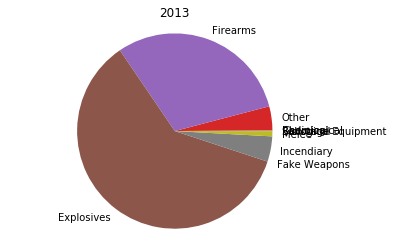

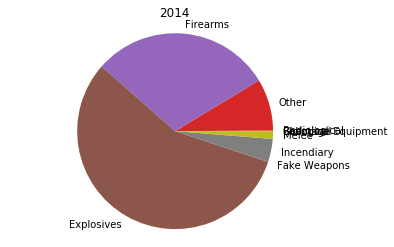

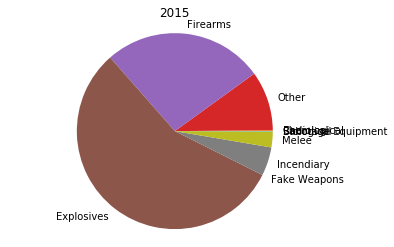

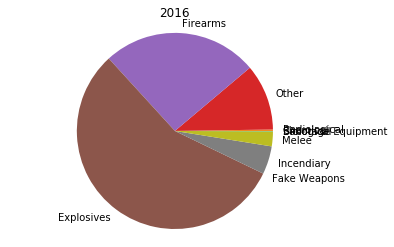

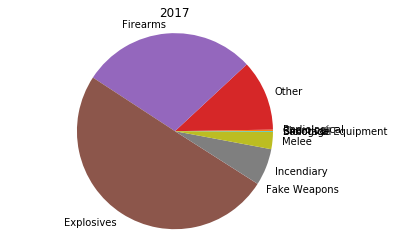

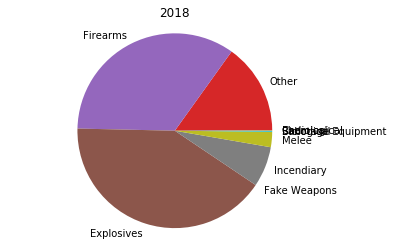

In [248]:
weapon_txts = ['Biological', 'Chemical', 'Radiological', 'Other', 'Firearms', 'Explosives', 'Fake Weapons', 'Incendiary', 'Melee','Sabotage Equipment']
weapon_codes = range(1,10)
weapon_dict = dict(zip(attack_codes, attack_txts))
weapon1_count={}
weapon2_count={}
weapon3_count={}
weapon4_count={}
weapon5_count={}
weapon6_count={}
weapon7_count={}
weapon8_count={}
weapon9_count={}
weapon10_count={}
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]
    weapon1_count=sum(data_year['weaptype1'] == 1)
    weapon2_count=sum(data_year['weaptype1'] == 2)
    weapon3_count=sum(data_year['weaptype1'] == 3)
    weapon4_count=sum(data_year['weaptype1'] == 13)
    weapon5_count=sum(data_year['weaptype1'] == 5)
    weapon6_count=sum(data_year['weaptype1'] == 6)
    weapon7_count=sum(data_year['weaptype1'] == 7)
    weapon8_count=sum(data_year['weaptype1'] == 8)
    weapon9_count=sum(data_year['weaptype1'] == 9)
    weapon10_count=sum(data_year['weaptype1'] == 11)
    sizes=[weapon1_count,weapon2_count, weapon3_count,weapon4_count,weapon5_count, weapon6_count,weapon7_count,weapon8_count, weapon9_count,weapon10_count]
    plt.pie(sizes,labels=weapon_txts)
    plt.title(i)
    plt.axis('equal')
    plt.show()

## (3) target_type vs time; target nationality vs time 

#### data cleaning (iyear, targtype1, natlty1)

In [249]:
print(df[['iyear']].isnull().values.any(),df[['targtype1']].isnull().values.any(),
      df[['natlty1']].isnull().values.any())

False False True


iyear, targtype1 columns do not have missing data

natlty1 column has missing data, while since we only count the number, it will not affect our final result. So we will keep it in the same way

In [251]:
target_type_txt = ['business','government_general','police','military','abortion related','airports and aircraft',
                   'government_diplomatic','educational institution','food or water supply','journalists and media',
                   'maritime','NGO','other','private citizens and property','religious figure or institutions',
                   'telecommunication','terrorists or non-state militias','tourists','transportation','unknown',
                   'utilities','violent political parties']
target_type_codes = range(1,23)
target_type_dict = dict(zip(target_type_codes, target_type_txt)) 
target_type_dict

{1: 'business',
 2: 'government_general',
 3: 'police',
 4: 'military',
 5: 'abortion related',
 6: 'airports and aircraft',
 7: 'government_diplomatic',
 8: 'educational institution',
 9: 'food or water supply',
 10: 'journalists and media',
 11: 'maritime',
 12: 'NGO',
 13: 'other',
 14: 'private citizens and property',
 15: 'religious figure or institutions',
 16: 'telecommunication',
 17: 'terrorists or non-state militias',
 18: 'tourists',
 19: 'transportation',
 20: 'unknown',
 21: 'utilities',
 22: 'violent political parties'}

#### plot for target type vs year 

In [253]:
# loop; 
# for each year, display distribution of attack numbers(y) vs regions(x)
top_3_targets_list = []
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]

    target_count = []
    for j in range(1,23):
        target_count.append(sum(data_year['targtype1'] == j))
    # verify # in region_count == size of data_year
    # data_year.shape[0] == sum(region_count)

    # get top 3 regions for iyear 
    top_3_idx = np.argsort(target_count)[-3:]
    top_3_idx = [x+1 for x in top_3_idx]
    top_3_target = [target_type_dict[x] for x in top_3_idx]
    top_3_targets_list.append(top_3_target)

    # plot data from iyear by region 
#     plt.plot(target_type_codes, target_count)
#     plt.title(i)
#     plt.xlabel('target_type_codes')
#     plt.ylabel('incidents #')
#     plt.show()

#### display top 3 target types over years (rightmost target type is the most frequent one)

In [254]:
top_3_targets_list_key = range(1970, 2019)
top_3_targets_list_value = top_3_targets_list
top_3_targets_list_dict = dict(zip(top_3_targets_list_key, top_3_targets_list_value)) 

In [255]:
top_3_targets_list_dict

{1970: ['police', 'military', 'business'],
 1971: ['government_general', 'military', 'business'],
 1972: ['business', 'military', 'private citizens and property'],
 1973: ['business', 'military', 'private citizens and property'],
 1974: ['military', 'private citizens and property', 'business'],
 1975: ['police', 'private citizens and property', 'business'],
 1976: ['government_diplomatic', 'private citizens and property', 'business'],
 1977: ['government_general', 'private citizens and property', 'business'],
 1978: ['police', 'government_general', 'business'],
 1979: ['private citizens and property', 'government_general', 'business'],
 1980: ['government_general', 'private citizens and property', 'business'],
 1981: ['business', 'private citizens and property', 'military'],
 1982: ['business', 'military', 'private citizens and property'],
 1983: ['business', 'private citizens and property', 'military'],
 1984: ['business', 'private citizens and property', 'military'],
 1985: ['private

### nationality txt to code dict 

In [256]:
nationality_codes = []
nationality_txt = []

filepath = 'nationality_dict.txt'
f = open(filepath, "r", encoding='utf-8-sig')
for x in f:
    tmp_list = x.split('=')
    tmp_code = int(tmp_list[0].strip())
    tmp_txt = tmp_list[1].strip()
    nationality_codes.append(tmp_code)
    nationality_txt.append(tmp_txt)
f.close()


In [257]:
nationality_dict = dict(zip(nationality_codes, nationality_txt)) 

In [258]:
nationality_map_tmp = range(225)
nationality_idx_map_dict = dict(zip(nationality_map_tmp, nationality_codes)) 

#### plot nationality vs year 

In [260]:
# loop; 
# for each year, display distribution of attack numbers(y) vs regions(x)
top_10_nationality_list = []
for i in range(1970,2019):
    data_year = df.loc[df['iyear'] == i]

    nationality_count = []
    for j in nationality_codes:
        nationality_count.append(sum(data_year['natlty1'] == j))
    # verify # in region_count == size of data_year
    # data_year.shape[0] == sum(region_count)

    # get top 3 regions for iyear 
    top_10_idx = np.argsort(nationality_count)[-10:]
    top_10_idx = [nationality_idx_map_dict[x] for x in top_10_idx]
    top_10_nationality = [nationality_dict[x] for x in top_10_idx]
    top_10_nationality_list.append(top_10_nationality)

    # plot data from iyear by region 
#     plt.plot(nationality_codes, nationality_count)
#     plt.title(i)
#     plt.xlabel('nationality_codes')
#     plt.ylabel('incidents #')
#     plt.show()

#### display top 10 nationality (ascending order, e.g. in 2018, Afghanistan --> most victims )

In [261]:
top_10_nationality_list_key = range(1970, 2019)
top_10_nationality_list_value = top_10_nationality_list
top_10_nationality_list_dict = dict(zip(top_10_nationality_list_key, top_10_nationality_list_value)) 

In [262]:
top_10_nationality_list_dict
# ascending order, e.g. in 2018, Afghanistan --> most victims 

{1970: ['Switzerland',
  'Spain',
  'Portugal',
  'Soviet Union',
  'Israel',
  'Northern Ireland*',
  'Argentina',
  'Uruguay',
  'Germany',
  'United States'],
 1971: ['Soviet Union',
  'Uruguay',
  'Argentina',
  'Turkey',
  'Iran',
  'Germany',
  'Spain',
  'Northern Ireland*',
  'Great Britain*',
  'United States'],
 1972: ['Argentina',
  'Iran',
  'Jordan',
  'Turkey',
  'Germany',
  'Spain',
  'Israel',
  'Great Britain*',
  'United States',
  'Northern Ireland*'],
 1973: ['Dominican Republic',
  'Colombia',
  'France',
  'Spain',
  'Israel',
  'Germany',
  'Argentina',
  'Great Britain*',
  'Northern Ireland*',
  'United States'],
 1974: ['Italy',
  'Puerto Rico*',
  'Israel',
  'France',
  'Germany',
  'Spain',
  'Argentina',
  'Great Britain*',
  'Northern Ireland*',
  'United States'],
 1975: ['Colombia',
  'Iran',
  'Japan',
  'Argentina',
  'France',
  'Germany',
  'Great Britain*',
  'Spain',
  'Northern Ireland*',
  'United States'],
 1976: ['Mexico',
  'France',
  'Turk

## (4) fatalities and damages

In [263]:
df.shape

(191464, 44)

#### data cleaning (iyear, nkills, nkillter, nwound, property, propvalue)

In [264]:
print(df[['iyear']].isnull().values.any(),df[['nkill']].isnull().values.any(), df[['nkillter']].isnull().values.any(),
      df[['nwound']].isnull().values.any(), df[['property']].isnull().values.any())

False True True True False


In [265]:
print(df[['nkill']].isnull().values.sum(), df[['nkillter']].isnull().values.sum(),
      df[['nwound']].isnull().values.sum(), df.loc[df['property'] == 1][['propvalue']].isnull().values.sum())

11029 67434 17559 55080


iyear, property columns do not have missing data

nkill, nkillter, nwound, property values columns have missing data. 

nkill has 11029 missing data, nkillter has 67434 missing data, nwound has 17559 missing data, propvalue (when property == 1) has 55080 missing data 

In [266]:
#select three cols to a new dataframe for analyzing damage:
df_dam = df[['iyear','nkill','nkillter','nwound','property','propvalue']]
df_dam.head()

iyear  nkill  nkillter  nwound  property  propvalue
0   1970    1.0       NaN     0.0         0        NaN
1   1970    0.0       NaN     0.0         0        NaN
2   1970    1.0       NaN     0.0         0        NaN
3   1970    NaN       NaN     NaN         1        NaN
4   1970    NaN       NaN     NaN         1        NaN

#### n_kills over year

In [267]:
df_dam_nkill = df_dam[['iyear', 'nkill']]   # clean data 
df_clean_nkill = df_dam_nkill.dropna();

Text(0.5, 1.0, 'The num of kills vs. years - from 1970 to 2018')

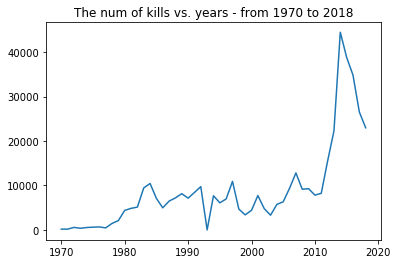

In [268]:
# select rows by year
nkill_list = []

for cur_year in range(1970,2019):
    test = df_clean_nkill[df_clean_nkill['iyear'] == cur_year]
    kill = test['nkill'].sum()
    nkill_list.append(kill)
plt.plot(range(1970,2019), nkill_list)
plt.title("The num of kills vs. years - from 1970 to 2018")

#### nkillter over year

In [269]:
df_dam_nkillter = df_dam[['iyear', 'nkillter']]   # clean data 
df_clean_nkillter = df_dam_nkillter.dropna();

Text(0.5, 1.0, 'The num of killter vs. years - from 1970 to 2018')

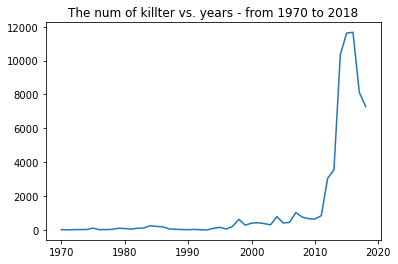

In [270]:
# select rows by year
nkillter_list = []

for cur_year in range(1970,2019):
    test = df_clean_nkillter[df_clean_nkillter['iyear'] == cur_year]
    killter = test['nkillter'].sum()
    nkillter_list.append(killter)
plt.plot(range(1970,2019), nkillter_list)
plt.title("The num of killter vs. years - from 1970 to 2018")

#### nwound over year

In [271]:
df_dam_nwound = df_dam[['iyear', 'nwound']]   # clean data 
df_clean_nwound = df_dam_nwound.dropna();

Text(0.5, 1.0, 'The num of wounds vs. years - from 1970 to 2018')

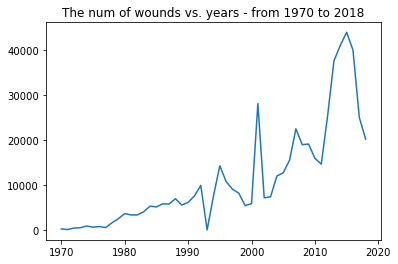

In [272]:
# select rows by year
nwound_list = []

for cur_year in range(1970,2019):
    test = df_clean_nwound[df_clean_nwound['iyear'] == cur_year]
    nwound = test['nwound'].sum()
    nwound_list.append(nwound)
plt.plot(range(1970,2019), nwound_list)
plt.title("The num of wounds vs. years - from 1970 to 2018")

#### property value loss over year

In [273]:
df_dam_propvalue = df_dam[['iyear', 'propvalue']]   # clean data
df_clean_propvalue= df_dam_propvalue.dropna();

Text(0.5, 1.0, 'The tatal value of propvalue_loss vs. years - from 1970 to 2018')

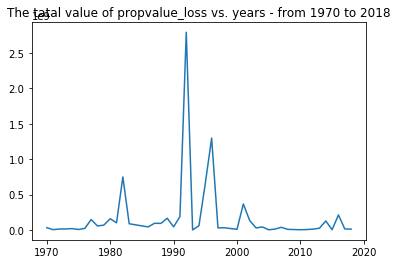

In [274]:
# select rows by year
propvalue_list = []

for cur_year in range(1970,2019):
    test = df_clean_propvalue[df_clean_propvalue['iyear'] == cur_year]
    propvalue = test['propvalue'].sum()
    propvalue_list.append(propvalue)
plt.plot(range(1970,2019), propvalue_list)
plt.title("The tatal value of propvalue_loss vs. years - from 1970 to 2018")

## (5) us related visualization

#### selected only incidents happening in the US as df2

In [275]:
df2 = df.loc[df['country']==217]

#### plot us #incidents over the year 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb93c154e10>]],
      dtype=object)

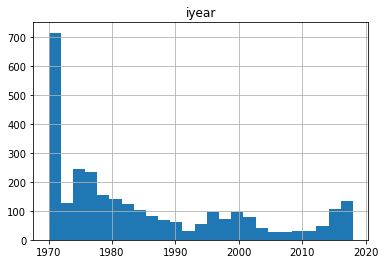

In [276]:
df2[['iyear']].hist(bins=25)

#### check incidents by state

In [277]:
df2['provstate'].value_counts()

California              606
New York                525
Puerto Rico             248
Florida                 164
Illinois                112
Washington              109
District of Columbia     85
Texas                    74
Oregon                   67
Massachusetts            57
Ohio                     51
Colorado                 47
New Jersey               47
Michigan                 46
Pennsylvania             45
Arizona                  42
Virginia                 42
Missouri                 40
Wisconsin                39
Maryland                 36
North Carolina           34
Georgia                  33
Minnesota                25
Tennessee                25
Nebraska                 24
Iowa                     24
New Mexico               24
Indiana                  23
Utah                     22
Louisiana                21
Nevada                   19
Connecticut              17
Alabama                  16
Oklahoma                 15
Kansas                   14
Idaho               

#### since from above, we can see that California has the most incidents in history, so we select California specifically to analyze: df3

In [278]:
df3=df2.loc[df2['provstate']=='California']

#### plot california #incidents over the year 

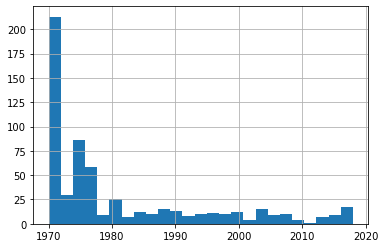

In [279]:
df3['iyear'].hist(bins=25)

#### since from above, we can see that New York has the most incidents in history, so we select New York specifically to analyze: df4

In [280]:
df4=df2.loc[df2['provstate']=='New York']

#### plot new york #incidents over the year 

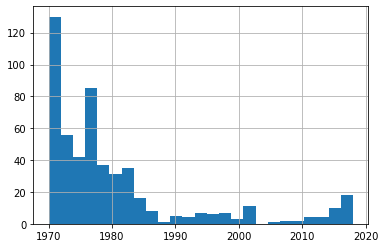

In [281]:
df4['iyear'].hist(bins=25)

#### check california attacktye distributions in history 

In [282]:
df3['attacktype1_txt'].value_counts()

Bombing/Explosion                      336
Facility/Infrastructure Attack         169
Armed Assault                           54
Assassination                           32
Unarmed Assault                          7
Hostage Taking (Kidnapping)              5
Hijacking                                1
Hostage Taking (Barricade Incident)      1
Unknown                                  1
Name: attacktype1_txt, dtype: int64

#### check new york attacktype distribution in history 

In [283]:
df4['attacktype1_txt'].value_counts()

Bombing/Explosion                      297
Facility/Infrastructure Attack         112
Armed Assault                           52
Assassination                           24
Unarmed Assault                         16
Hostage Taking (Barricade Incident)     15
Hijacking                                6
Hostage Taking (Kidnapping)              2
Unknown                                  1
Name: attacktype1_txt, dtype: int64

#### since Bombing/Explosion is the most frequent attack type, plot #incidents of this attacktype over year in California

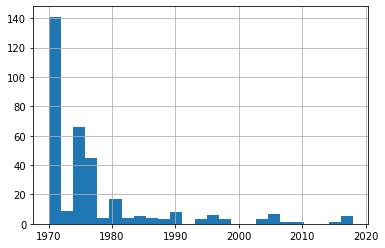

In [284]:
df3.loc[df3['attacktype1_txt']=='Bombing/Explosion']['iyear'].hist(bins=25)

#### since Bombing/Explosion is the most frequent attack type, plot #incidents of this attacktype over year in New York

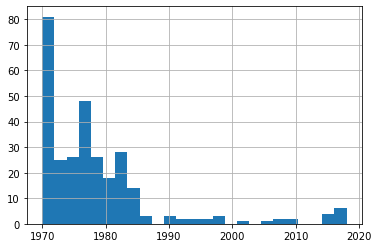

In [285]:
df4.loc[df4['attacktype1_txt']=='Bombing/Explosion']['iyear'].hist(bins=25)